# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за период с 27 ноября 2014 года по 03 мая 2019 года.

Цель исследования — выявить параметры, необходимые для определения рыночной стоимости объектов недвижимости. Задачи - выполнить предобработку данных и изучить их; выявить, как быстро продавались квартиры; какие факторы больше всего влияют на общую стоимость объекта; среднюю цену одного квадратного метра; как стоимость объектов зависит от расстояния до центра города. Это позволит построить автоматизированную систему для отслеживания аномалии и мошеннической деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма).

На основе описания данных о продаже квартир в Санкт-Петербурге и соседних населённых пунктах предстоит исследовать следующие гипотезы о параметрах рыночной стоимости объектов недвижимости:

- Цена квартиры зависит от её общей площади - чем больше площадь квартиры, тем выше её стоимость.

- Цена квартиры зависит от числа комнат - квартиры с большим числом комнат, как правило, дороже.

- Квартиры с большим числом этажей стоят дороже, чем в малоэтажных домах.

- Квартиры с большей жилой площадью  и большей площадью кухни стоят дороже.

- Квартиры, расположенные ближе к центру города, аэропорту, паркам и водоёмам, стоят дороже.

- Цена квартиры зависит от срока экспозиции — чем дольше квартира выставлена на продажу, тем ниже её цена.

Для проверки гипотез необходимо подготовить данные:

- загрузить данные из источника;
- провести предварительный анализ данных (изучение структуры, типов данных, пропусков и аномалий).
- очистить и предобработать данных;
- устранить пропуски и аномалии;
- преобразовать числовые переменных в категориальные;
- нормализовать числовые признаки, если это необходимо.

Провести анализ данных:
-  описательной статистики для понимания распределения характеристик;
- визуализировать данные с помощью графиков (гистограммы, диаграммы рассеяния);
- описать наблюдения и выводы.

### Обзор файла с данными

In [ ]:
# импорт необходимых модулей:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#настройка для отображения чисел в float формате
pd.options.display.float_format = '{:.3f}'.format

#установка максимального количества отображаемых столбцов
pd.set_option('display.max_columns', None)

In [ ]:
#загрузим данные из источник
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
#посмотрим первые пять строк
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,False,False,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,False,False,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,False,False,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,False,False,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,False,False,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


Есть ошибка в наименовании одного столбца - cityCenters_nearest.

In [ ]:
#посмотрим самую раннюю дату размещения
data['first_day_exposition'].min()

'2014-11-27T00:00:00'

In [ ]:
#и самую позднюю дату размещения
data['first_day_exposition'].max()

'2019-05-03T00:00:00'

Временной период собранных данных - с 27 ноября 2014 года по 03 мая 2019 года.

In [ ]:
#посмотрим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Датасет содержит 23699 строк, 22 столбца.
Представлены данные разных типов -  bool(2), float64(14), int64(3), object(3).
На основе выведенных данных, мы можем сделать вывод, что тип признаков соответствует их смысловому содержанию в большинстве столбцов.

В столбце is_apartment - скорее всего, правильным для этого столбца будет тип bool.

Для столбца balcony нужен тип int.

Столбец first_day_exposition - нужно изменить тип object на datetime.

In [ ]:
#посмотрим статистику по каждому столбцу
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000,23699.000,23699.000,23699.000,14504.000,23613.000,21796.000,23699.000,21421.000,12180.000,18157.000,18180.000,18181.000,8079.000,18181.000,9110.000,20518.000
mean,9.858,6541548.772,60.349,2.071,2.771,10.674,34.458,5.892,10.570,1.150,28793.672,14191.278,0.611,490.805,0.770,517.981,180.889
std,5.683,10887013.268,35.654,1.078,1.261,6.597,22.030,4.885,5.905,1.071,12630.881,8608.386,0.802,342.318,0.938,277.721,219.728
min,0.000,12190.000,12.000,0.000,1.000,1.000,2.000,1.000,1.300,0.000,0.000,181.000,0.000,1.000,0.000,13.000,1.000
25%,6.000,3400000.000,40.000,1.000,2.520,5.000,18.600,2.000,7.000,0.000,18585.000,9238.000,0.000,288.000,0.000,294.000,45.000
50%,9.000,4650000.000,52.000,2.000,2.650,9.000,30.000,4.000,9.100,1.000,26726.000,13098.500,0.000,455.000,1.000,502.000,95.000
75%,14.000,6800000.000,69.900,3.000,2.800,16.000,42.300,8.000,12.000,2.000,37273.000,16293.000,1.000,612.000,1.000,729.000,232.000
max,50.000,763000000.000,900.000,19.000,100.000,60.000,409.700,33.000,112.000,5.000,84869.000,65968.000,3.000,3190.000,3.000,1344.000,1580.000


Есть расхождение между средним и медианой в некоторых столбцах, в максимальных значениях встречаются неправдоподобные цифры - это все наводит на мысли о наличии выбросов и аномалий в данных.

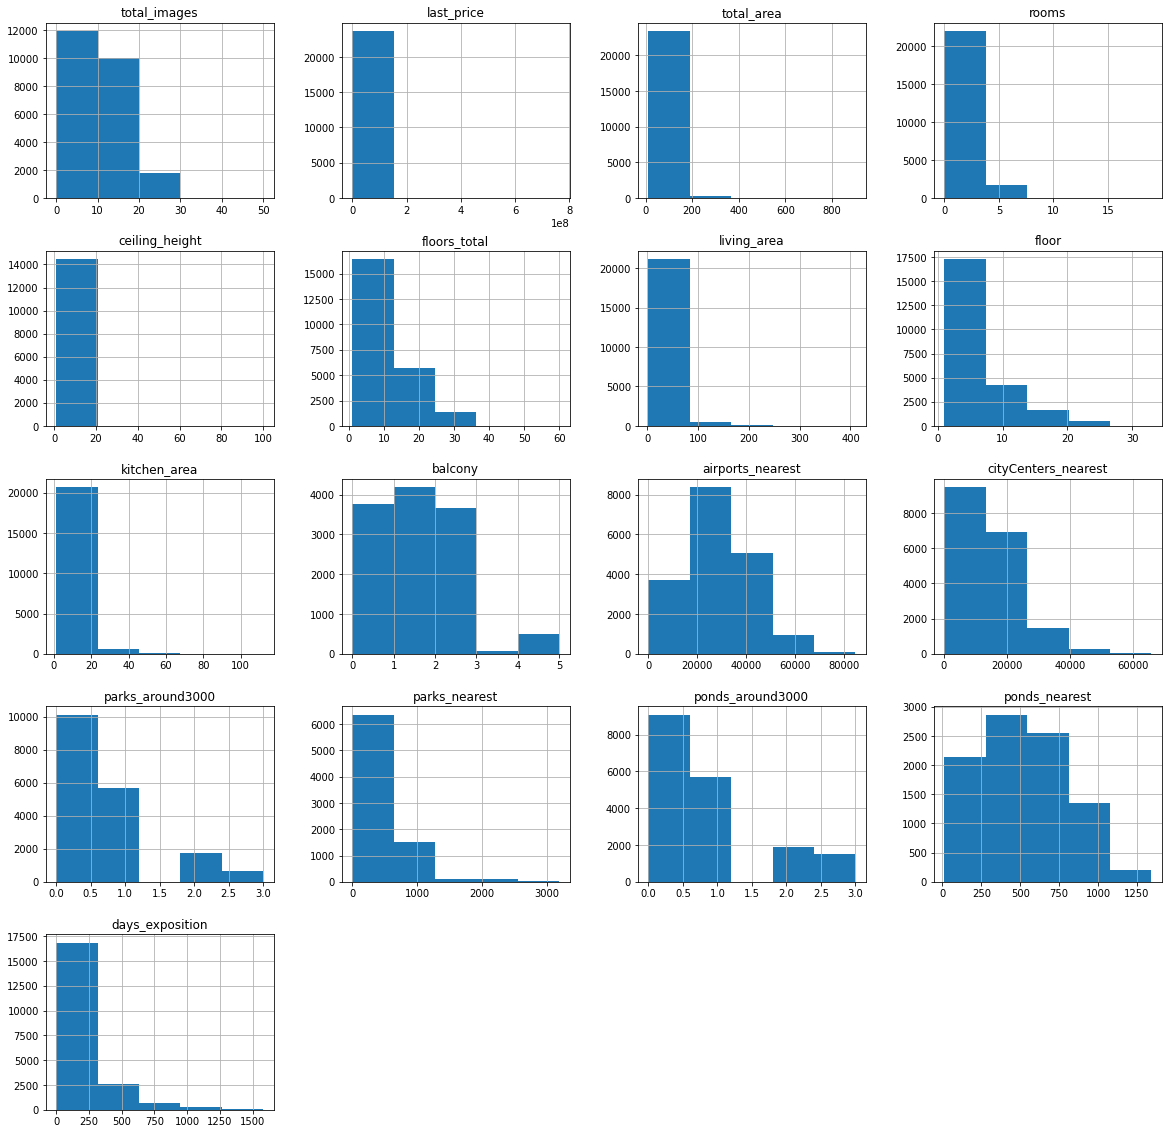

In [ ]:
#общая гистограмма для всех числовых столбцов таблицы.
data.hist(figsize=(20, 20), bins=5)
plt.show()

Не все графики отобразились корректно. Например, показатель last_price, living_area, total_area поместились в одну-две корзины, что не  способствует наглядности. В некоторых гистограммах (balcony, park_around3000, ponds_around3000) видны выбросы, требующие удаления.

*Предварительный вывод*

Обзор данных проведен, выявлена необходимость исправлений названия одного столбца, типа данных нескольких значений, изучения данных на предмет пропусков, аномалий и выбросов.

### Предобработка данных

План работы:
1. Найти и изучить пропущенные значения в столбцах
Заполнить пропущенные значения там, где это возможно
2. Рассмотреть типы данных в каждом столбце, если нужно - изменить
3. Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты.
4. Найти и устранить редкие и аномальные значения.

In [ ]:
#названию столбца cityCenters_nearest требуется корректировка в змеинный регистр
data = data.rename(columns={"cityCenters_nearest": "city_centers_nearest"})

In [ ]:
#посчитаем количество явных дубликатов
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


In [ ]:
#посчитаем пропуски по каждому столбцу
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [ ]:
#посчитаем процент количества пропусков от общего количества данных
((data.isna().sum() / len(data)).round(4) * 100).sort_values(ascending=False)

is_apartment           88.290
parks_nearest          65.910
ponds_nearest          61.560
balcony                48.610
ceiling_height         38.800
airports_nearest       23.380
city_centers_nearest   23.290
ponds_around3000       23.280
parks_around3000       23.280
days_exposition        13.420
kitchen_area            9.610
living_area             8.030
floors_total            0.360
locality_name           0.210
total_images            0.000
last_price              0.000
studio                  0.000
floor                   0.000
rooms                   0.000
first_day_exposition    0.000
total_area              0.000
open_plan               0.000
dtype: float64

Из 22 столбцов имеют пропуски 14.

Из данных, вводимых вручную, самый высокий процент пропусков в столбце "is_apartment" (88%), "balcony" (48%) и "ceiling_height" (38%). Такое большое количество пропусков этих данных требует изучения.

Большее количество пропусков у данных, созданных автоматически на основе картографических показателей (от 13 до 65%, мода около 23%). Скорее всего, это вызвано техническими проблемами.

Изучим и подготовим каждый столбец для анализа

#### Столбец "total_images" - число фотографий квартиры в объявлении

In [ ]:
#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['total_images'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['total_images'].dtypes)
print('Количество уникальных значений:', len(data['total_images'].unique()))

Количество пропусков: 0
Тип данных: int64
Количество уникальных значений: 38


Предполагаю, что данные сформированы автоматически на основе количества загруженных фотографий объекта, однако, все же нужно удалить выборы, способные повлиять на результаты машинного обучения.

<AxesSubplot:>

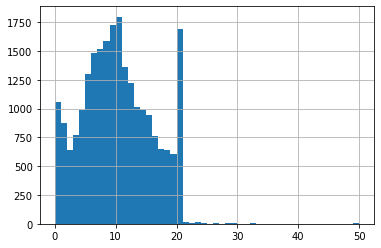

In [ ]:
#Посмотрим гистограмму по данному столбцу
data['total_images'].hist(bins=50, range=(0, 50))

Гистрограмма распределения имеет форму колокола, но также присутвуют несколько пиков, чего для нормального распреденения не характерно.
Максимальное значение (50) может указывать на наличие выбросов или объектов с аномально большим количеством изображений.
После 30 на графике гистограмма сливается с нулём, потому примем верхнюю границу в 26.

In [ ]:
#oчистим от выбросов
data = data.query('total_images < 26')

<AxesSubplot:>

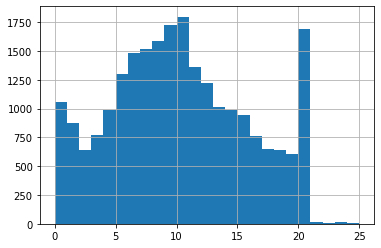

In [ ]:
#посмотрим гистограмму по данному столбцу
data['total_images'].hist(bins=25, range=(0, 25))

Гистограмма также имеет форму колокола, с пиками на нескольких значениях. На боксплоте выбросов нет.

#### Cтолбец last_price - цена на момент снятия с публикации

In [ ]:
#количество пропусков в столбце
print("Количество пропусков", data['last_price'].isna().sum())
print('Тип данных столбца', data['last_price'].dtypes) #выведем тип данных столбца
print(data['last_price'].value_counts())

Количество пропусков 0
Тип данных столбца float64
4500000.000     342
3500000.000     291
4300000.000     260
4000000.000     260
4200000.000     259
               ... 
10430000.000      1
9917600.000       1
3180500.000       1
7297000.000       1
4386000.000       1
Name: last_price, Length: 2975, dtype: int64


In [ ]:
#преобразуем тип данных для большей наглядности
data['last_price'] = data['last_price'].astype(int)
#проверим преобразование
print(data['last_price'].dtypes)

int64


In [ ]:
#посмотрим описательную статистику
data['last_price'].describe()

count       23669.000
mean      6535171.631
std      10889109.380
min         12190.000
25%       3400000.000
50%       4646000.000
75%       6775000.000
max     763000000.000
Name: last_price, dtype: float64

Медиана и среднее занчение около 6,5млн рублей, при этом максимальная цена - 763млн. рублей.

<AxesSubplot:>

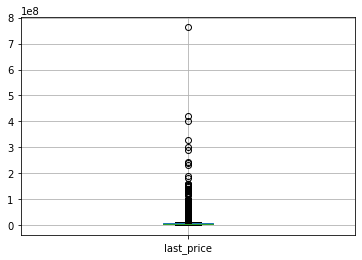

In [ ]:
#посмотрим боксплот
data.boxplot('last_price')

По графику видно, что большинство цен находится в диапазоне до 20млн.рублей, но есть много объектов дороже.

Дороже 50млн.рублей стоят квартиры очень большой площади, с большим количеством комнат. Это, вероятно, соответствует действительности, но является выбросами в соответствии с боксплотом.

После значения 15млн.рублей частота распределения снижается. Методом перебора параметров боксплотов и гистограмм, пришла к выводу, выбросы нужно отсечь на 15млн. отметке. При этом нижний порог установим на 2млн

In [ ]:
#отбросим выбросы
data = data.query('2000000< last_price <15000000')

<AxesSubplot:>

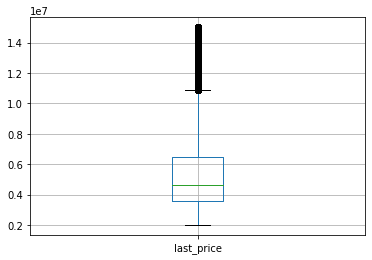

In [ ]:
#проверим боксплот
data.boxplot('last_price')

Выбросов осталось довольно много, удалять все - терять данные.

#### Столбец total_area - общая площадь квартиры в квадратных метрах (м²)

In [ ]:
#посчитаем количество пропусков в столбце
print("Количество пропусков", data['total_area'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['total_area'].dtypes)
#посмотрим количество уникальных значений
print('Количество уникальных значений:', len(data['total_area'].unique()))

Количество пропусков 0
Тип данных: float64
Количество уникальных значений: 1775


Тип данных оставим как есть, тк присутствуют значения с плавающей точкой.

<AxesSubplot:>

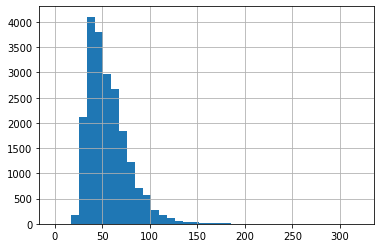

In [ ]:
#посмотрим гистограмму по данному столбцу
data['total_area'].hist(bins=38, range=(0, 320))

График имеет форму колокола с резким подъемом слева.

<AxesSubplot:>

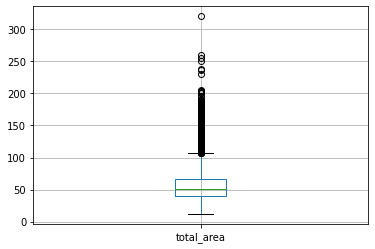

In [ ]:
data.boxplot('total_area')

Согласно боксплоту выбросы начинаются примерно после 105кв.м.
Минимальная площадь квартиры 12кв.метров - похоже, что это маленькая студия.

In [ ]:
#Очистим от выбросов
data = data.query('total_area < 105')

<AxesSubplot:>

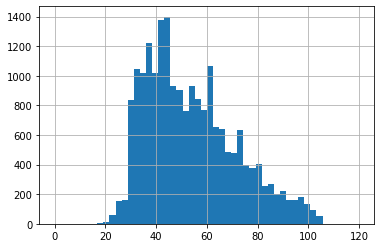

In [ ]:
data['total_area'].hist(bins=50, range=(0, 120))

Распределение стало более близким к нормальному

#### Cтолбец first_day_exposition - дата публикации

In [ ]:
#посчитаем количество пропусков в столбце
print("Количество пропусков", data['first_day_exposition'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['first_day_exposition'].dtypes)
#посмотрим уникальные значения
print('Количество уникальных значений:', len(data['first_day_exposition'].unique()))
#посмотрим уникальные значения
print(data['first_day_exposition'].value_counts())

Количество пропусков 0
Тип данных: object
Количество уникальных значений: 1475
2018-02-01T00:00:00    318
2017-11-10T00:00:00    206
2017-10-13T00:00:00    104
2017-09-27T00:00:00     91
2018-07-10T00:00:00     79
                      ... 
2015-06-08T00:00:00      1
2015-09-17T00:00:00      1
2015-10-17T00:00:00      1
2015-01-29T00:00:00      1
2016-09-03T00:00:00      1
Name: first_day_exposition, Length: 1475, dtype: int64


Пропусков нет, тип данных нужно поменять с object на datetime.

In [ ]:
#поменяем тип данных на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#проверяем
print(data['first_day_exposition'].dtype)

datetime64[ns]


Данные типа datetime представляют собой временные метки, которые содержат информацию о дате и времени. Они не являются числовыми данными и не подлежат прямому анализу распределения, как это делается с количественными переменными.

#### Cтолбец rooms - число комнат

In [ ]:
#посчитаем количество пропусков в столбце
print("Количество пропусков", data['rooms'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['rooms'].dtypes)
#посчитаем количество уникальных значений
print('Количество уникальных значений:', len(data['rooms'].unique()))
#посмотрим уникальные значения
print(data['rooms'].value_counts())

Количество пропусков 0
Тип данных: int64
Количество уникальных значений: 8
1    7361
2    7166
3    4926
4     636
0     169
5      49
6       4
7       1
Name: rooms, dtype: int64


Выявилось, что 169 объектов имеют 0 комнат. Это аномальное значение, поскольку жилое помещение должно иметь хотя бы одну комнату.

In [ ]:
#посмотрим на выброс
data[data["rooms"] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.000,2017-03-30,0,NaN,24.000,15.500,2,NaN,True,False,NaN,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.000
349,4,2320000,25.000,2017-09-27,0,NaN,14.000,17.000,1,NaN,False,True,NaN,0.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.000
440,8,2480000,27.110,2018-03-12,0,NaN,17.000,24.750,4,NaN,True,False,NaN,2.000,Санкт-Петербург,38171.000,15015.000,0.000,NaN,2.000,982.000,64.000
508,0,3375000,34.400,2017-03-28,0,NaN,26.000,24.300,19,NaN,False,True,NaN,1.000,посёлок Парголово,53115.000,19292.000,0.000,NaN,1.000,593.000,430.000
697,12,2500000,24.100,2017-12-01,0,2.750,25.000,17.500,21,NaN,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22877,2,4280000,28.000,2017-10-26,0,2.700,19.000,18.000,10,NaN,True,False,NaN,NaN,Санкт-Петербург,18982.000,7206.000,0.000,NaN,1.000,415.000,151.000
23210,7,3200000,26.000,2017-09-01,0,NaN,25.000,18.000,16,NaN,True,False,NaN,0.000,Санкт-Петербург,11405.000,13222.000,0.000,NaN,1.000,623.000,14.000
23442,0,2500000,27.700,2017-09-28,0,NaN,24.000,18.000,4,NaN,False,True,NaN,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.000
23554,15,3350000,26.000,2018-09-07,0,NaN,19.000,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.000,17092.000,0.000,NaN,2.000,112.000,31.000


Из небольшого количества строк видно, что это объекты малой площади, вполне вероятно, квартиры-студии. Заменим ноль на 1

In [ ]:
# исправим на 1
data.loc[data['rooms'] == 0, 'rooms'] = 1

<AxesSubplot:>

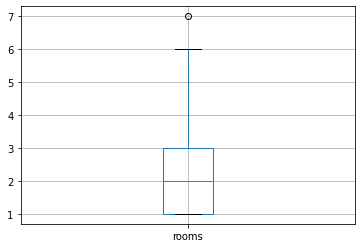

In [ ]:
#построим боксплот
data.boxplot('rooms')

In [ ]:
#удалим выбросы 6 и более комнат
data = data[data['rooms'] < 6]

<AxesSubplot:>

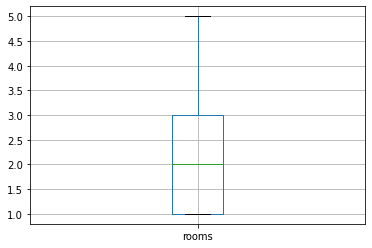

In [ ]:
data.boxplot('rooms')

Выбросов нет

#### Cтолбец ceiling_height - высота потолков (м)

In [ ]:
#посчитаем количество пропусков в столбце
print("Количество пропусков", data['ceiling_height'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['ceiling_height'].dtypes)

#посмотрим уникальные значения
print('Подсчет уникальных значений')

print(data['ceiling_height'].value_counts())

Количество пропусков 7855
Тип данных: float64
Подсчет уникальных значений
2.500     3104
2.600     1517
2.700     1445
2.550      899
2.800      881
          ... 
10.300       1
3.480        1
4.250        1
26.000       1
3.360        1
Name: ceiling_height, Length: 159, dtype: int64


Столбец "Высота потолков" (ceiling_height) имеет 7855 пропусков, это много от изначального количества данных. Для удаления это слишком большой объем.

<AxesSubplot:>

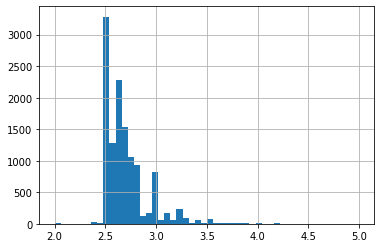

In [ ]:
#посмотрим гистограмму
data['ceiling_height'].hist(bins=50, range=(2, 5))

<AxesSubplot:>

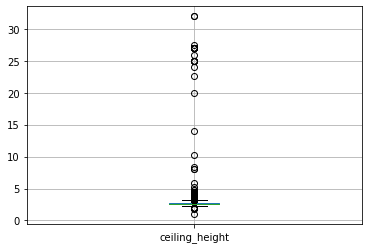

In [ ]:
data.boxplot('ceiling_height')

Видно, что основная масса объетов входит в интервал 2,4-3,4 метров.
Среди уникальных значений фигурируют очень большие показатели (32, 26 метров), отфильтруем данные, и посмотрим, какие еще значения встречаются более 4 метров.

In [ ]:
data.query('ceiling_height > 4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000,80.000,2018-11-06,3,4.150,3.000,44.200,2,NaN,False,False,12.200,NaN,Санкт-Петербург,20562.000,3167.000,2.000,344.000,1.000,838.000,38.000
355,17,3600000,55.200,2018-07-12,2,25.000,5.000,32.000,2,False,False,False,NaN,2.000,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.000
1129,20,6695000,36.900,2018-09-28,1,4.060,5.000,22.000,2,NaN,False,False,7.200,NaN,Санкт-Петербург,21725.000,2990.000,1.000,596.000,1.000,866.000,110.000
2639,17,4850000,59.700,2017-11-18,3,4.190,5.000,46.300,4,NaN,False,False,6.400,1.000,Санкт-Петербург,42964.000,15468.000,0.000,NaN,0.000,NaN,60.000
2802,7,14950000,50.000,2016-03-06,2,4.800,3.000,30.000,2,NaN,False,False,10.000,0.000,Санкт-Петербург,24433.000,1725.000,1.000,589.000,3.000,161.000,160.000
2823,8,2700000,39.000,2018-02-01,1,4.500,6.000,18.300,6,NaN,False,False,8.400,NaN,посёлок городского типа Токсово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2843,15,11990000,104.000,2018-03-13,3,4.200,3.000,66.000,2,NaN,False,False,15.000,NaN,Санкт-Петербург,22393.000,3884.000,0.000,NaN,0.000,NaN,350.000
2999,11,4450000,36.000,2017-12-12,1,4.190,5.000,18.000,1,NaN,False,False,8.000,NaN,Санкт-Петербург,24689.000,4256.000,1.000,1077.000,3.000,690.000,78.000
3067,13,6600000,95.000,2018-09-08,2,4.500,7.000,45.000,7,True,False,False,25.000,2.000,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.000
3148,14,2900000,75.000,2018-11-12,3,32.000,3.000,53.000,2,NaN,False,False,8.000,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Площадь этих объектов не велика,  потому можно предположить ошибку при вводе данных, и перевести цифры более 20 метров в 2.0.

In [ ]:
#исправим данные от 20 метров и больше.
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height']*0.1

In [ ]:
#проверим, какое значение высоты потолков на данном этапе максимальное
print("Максимум:", data['ceiling_height'].max())
print("Минимум:", data['ceiling_height'].min())

Максимум: 14.0
Минимум: 1.0


Это тоже аномальные значения, 14 метров - навряд ли соответсвует реальности, и даже если их перевести в 1.4 метра - это будет меньше человеческого роста. Помещений с высотой потолков 1 метр не существует.

Исходя из графиков, выбросами будут значения до 2.4 и более 3,4

In [ ]:
#Очистим от выбросов с условием высоты потолков более 2,4 метра с сохранением пропусков
data = data[(data['ceiling_height'] > 2.0) & (data['ceiling_height'] <= 3.4) | (data['ceiling_height'].isna())]

<AxesSubplot:>

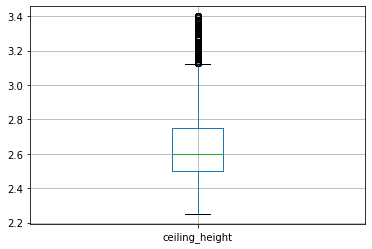

In [ ]:
data.boxplot('ceiling_height')

Боксплот выглядит более сбалансированным. Выбросами на этом графике стали значения, которые на прошлом боксплоте входили в 75 процентиль.

In [ ]:
data['ceiling_height'].describe()

count   12226.000
mean        2.678
std         0.190
min         2.250
25%         2.500
50%         2.600
75%         2.750
max         3.400
Name: ceiling_height, dtype: float64

Медиана равна среднему значению

In [ ]:
#заполним пропуски медианой
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#проверим количество пропусков в столбце
print("Количество пропусков", data['ceiling_height'].isna().sum())

Количество пропусков 0


<AxesSubplot:>

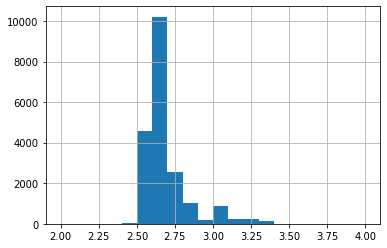

In [ ]:
data['ceiling_height'].hist(bins=20, range=(2, 4))

<AxesSubplot:>

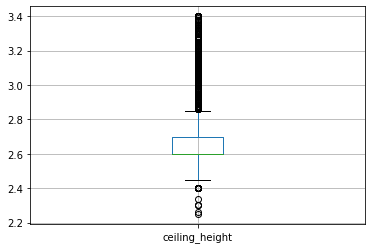

In [ ]:
data.boxplot('ceiling_height')

#### Cтолбец floors_total - всего этажей в доме

In [ ]:
#посчитаем количество пропусков в столбце
print("Количество пропусков", data['floors_total'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['floors_total'].dtypes)
print('Количество уникальных значений:', len(data['floors_total'].unique()))
#посмотрим уникальные значения
print(data['floors_total'].value_counts())

Количество пропусков 74
Тип данных: float64
Количество уникальных значений: 36
5.000     4490
9.000     3593
12.000    1275
16.000    1264
10.000    1089
25.000    1010
4.000      837
17.000     789
6.000      597
14.000     532
18.000     461
3.000      448
24.000     447
7.000      417
23.000     334
15.000     327
19.000     306
22.000     268
8.000      265
20.000     234
13.000     202
11.000     166
2.000      162
27.000     161
21.000     148
26.000     120
35.000      24
28.000      21
1.000       12
36.000       3
34.000       1
33.000       1
60.000       1
29.000       1
52.000       1
Name: floors_total, dtype: int64


Присутствуют пропуски. Встречаются значения 35, 36,60, 52

<AxesSubplot:>

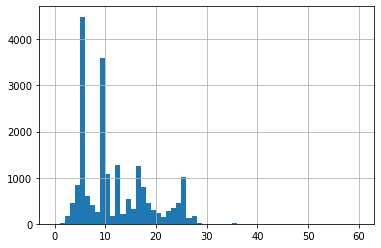

In [ ]:
#посмотрим гистограмму по данному столбцу
data['floors_total'].hist(bins=60, range=(0, 60))

Гистограмма получилась рвания, со множеством пиков. После 28 гистрограмма сливается с нулем.

In [ ]:
#посмотрим пропущенные значения
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.200,2018-10-02,2,2.600,NaN,30.800,4,NaN,False,False,12.000,NaN,Санкт-Петербург,39197.000,12373.000,1.000,123.000,0.000,NaN,49.000
237,4,2438033,28.100,2016-11-23,1,2.600,NaN,20.750,1,NaN,False,False,NaN,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,251.000
457,4,9788348,70.800,2015-08-01,2,2.600,NaN,38.400,12,NaN,False,False,10.630,0.000,Санкт-Петербург,37364.000,8322.000,2.000,309.000,2.000,706.000,727.000
671,4,6051191,93.600,2017-04-06,3,2.600,NaN,47.100,8,NaN,False,False,16.800,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,123.000
1757,5,3600000,39.000,2017-04-22,1,2.600,NaN,NaN,9,NaN,False,False,NaN,0.000,Санкт-Петербург,22735.000,11618.000,1.000,835.000,1.000,652.000,77.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21651,4,7143060,44.700,2019-01-11,1,3.000,NaN,13.790,19,NaN,False,False,NaN,NaN,Санкт-Петербург,9222.000,11340.000,0.000,NaN,0.000,NaN,NaN
21753,7,6800000,57.000,2017-05-01,2,2.600,NaN,NaN,21,NaN,False,False,NaN,0.000,Санкт-Петербург,17618.000,14600.000,2.000,104.000,0.000,NaN,36.000
22542,5,8500000,63.500,2017-05-24,2,2.800,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.000,15363.000,0.000,NaN,1.000,853.000,512.000
22656,4,4574160,64.500,2017-04-02,2,2.600,NaN,31.700,20,NaN,False,False,14.400,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,127.000


Всего 74 пропуска, при этом указан этаж объекта. Будет неправильно заменить на медиану - может оказаться, что объект находится выше, чем показатель медианы. Заполнить этажем нахождения квартиры тоже некорректно, тк окажется, что квартира на последнем этаже, а это важный показатель для исследования, недопустимо его искажать. Оставим пропуски как есть, тк их очень малая доля. Из-за наличия пропусков нельзя изменить тип данных на int

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Почему бы не удалить эти объявления, их очень мало и это никак на анализ не повлияет.

<font color='blue'> <h2> Комментарий студента V1<a class="tocSkip"> </h2>
Когда только начала исправлять ошибки после ревью, удалила, но к концу правки поняла, что это тоже было излишним, тк в итоге отфильтровалось слишком много данных. Оставлю как есть.</font>



<div class="alert alert-warning">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Как может слишком много отфильтроваться данных, если пропуска изначально всего 86. Посмотри, правильно ли ты использовала метод удаления пропусков.

<AxesSubplot:>

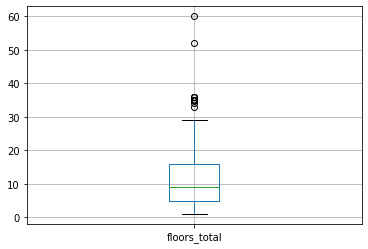

In [ ]:
#определим выбросы, построив боксплот
data.boxplot('floors_total')

In [ ]:
#посмотрим на выбросы - более 30 этажей
data[data["floors_total"] >= 30]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000,54.000,2018-03-22,2,2.600,36.000,21.400,28,NaN,False,False,18.700,1.000,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,11.000
871,14,7777777,75.000,2017-11-16,2,2.600,35.000,40.500,23,NaN,False,False,11.700,NaN,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,169.000
1060,10,5200000,50.000,2015-11-06,2,2.600,35.000,39.000,15,False,False,False,20.500,2.000,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,281.000
1697,11,3550000,28.000,2018-02-08,1,2.650,34.000,18.000,23,NaN,False,False,NaN,NaN,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,410.000
1917,13,10150000,74.000,2017-11-17,2,2.800,35.000,34.400,30,NaN,False,False,13.000,NaN,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,NaN
2253,12,3800000,45.500,2018-06-28,2,2.880,60.000,27.400,4,NaN,False,False,7.400,NaN,Кронштадт,67763.000,49488.000,2.000,342.000,3.000,614.000,166.000
2966,9,4300000,37.000,2017-08-08,1,2.600,35.000,14.000,15,NaN,False,False,10.400,0.000,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,50.000
4855,12,5500000,50.000,2017-06-22,1,2.800,35.000,22.000,4,NaN,False,False,13.000,NaN,Санкт-Петербург,18627.000,20339.000,1.000,609.000,3.000,145.000,537.000
5749,20,3590000,25.000,2017-08-30,1,2.800,35.000,NaN,26,NaN,False,True,NaN,2.000,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,198.000
5807,17,8150000,80.000,2019-01-09,2,2.700,36.000,41.000,13,NaN,False,False,12.000,5.000,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,38.000


В большинстве своем эти объекты недвижимости находятся в 35-этажном доме (действительно, такой дом есть в СПб  - ЖК "Князь Александр Невский"), выбиваются два значения - дома в 60 этажей в Крондштате (что не соответствует действительности) и 52-этажный дом в СПб (в котором объект на 18 этаже).
60 этажей скорее всего возникли в результате ошибки при вводе данных и являются 6 этажами (исправим), а подтверждение наличия дома в 52 этажа найти не удалось, примем за аномалию и удалим.

In [ ]:
#исправим 60 этажей на 6
data.loc[data['floors_total'] == 60, 'floors_total'] = data['floors_total']*0.1
#проверим изменение
data[(data['floors_total'] == 6) & (data['locality_name'] == 'Кронштадт')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000,45.500,2018-06-28,2,2.880,6.000,27.400,4,NaN,False,False,7.400,NaN,Кронштадт,67763.000,49488.000,2.000,342.000,3.000,614.000,166.000


In [ ]:
#удалим строку со значением общего количества этажей в 52
data = data.drop(data[data['floors_total'] == 52].index)

<AxesSubplot:>

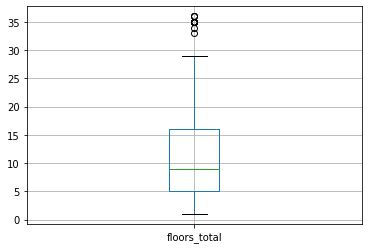

In [ ]:
#проверим распределение
data.boxplot('floors_total')

Несмотря на то, что 35 этажей - это выброс, считаю нужным его оставить для более показательного исследования.

#### Cтолбец living_area - жилая площадь в квадратных метрах (м²)

In [ ]:
#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['living_area'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['living_area'].dtypes)
print('Количество уникальных значений:', len(data['living_area'].unique()))

Количество пропусков: 1461
Тип данных: float64
Количество уникальных значений: 1294


In [ ]:
#посмотрим уникальные значения
print(data['living_area'].value_counts())

18.000    781
17.000    561
30.000    534
20.000    447
16.000    445
         ... 
10.900      1
49.250      1
33.470      1
3.000       1
16.740      1
Name: living_area, Length: 1293, dtype: int64


<AxesSubplot:>

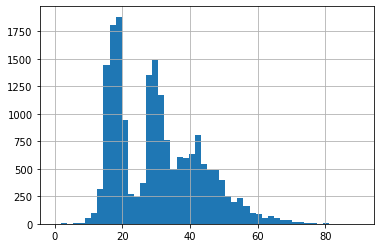

In [ ]:
#посмотрим гистограмму по данному столбцу
data['living_area'].hist(bins=50, range=(0, 90))

<AxesSubplot:>

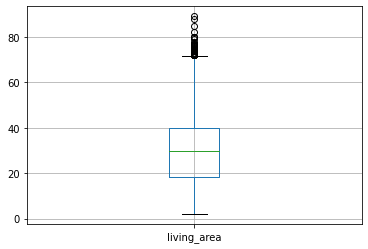

In [ ]:
#построим боксплот
data.boxplot('living_area')

In [ ]:
#посмотрим описательную статистику
data['living_area'].describe()

count   18619.000
mean       30.499
std        12.695
min         2.000
25%        18.300
50%        29.550
75%        39.700
max        89.100
Name: living_area, dtype: float64

Несмотря на наличие выбросов и гистограмму с несколькими пиками, медиана 29.500 близка по значению к среднему. При этом минимальная площадь 2кв.м. - это явно аномалия.

In [ ]:
"""
посмотрим строки с площадью менее 10кв.м. -
как жилая площадь сочетается с общей площадью и площадью кухни,
показателем 'studio'
"""

area = data.query('living_area < 9 and living_area.notna()')[[
    'total_area', 'living_area', 'kitchen_area', 'balcony', 'studio'
]]

print(area)

       total_area  living_area  kitchen_area  balcony  studio
114        21.400        8.300         6.300      NaN   False
2309       62.400        8.400        41.000    2.000   False
3242       41.000        3.000        11.000      NaN   False
13915      52.000        2.000         9.000      NaN   False
16431      31.000        6.000        17.000      NaN   False
17248      33.000        8.900        16.100    1.000   False
17582      22.000        5.000           NaN    2.000    True
19251      33.000        6.500        18.000      NaN   False
20994      50.600        8.000        31.000      NaN   False
21505      35.300        8.500        16.100    2.000   False
21758      23.000        2.000           NaN      NaN    True
21943      77.600        5.400         9.800      NaN   False
23208      37.000        8.000        22.000    0.000   False


Из среза видно, что маленькая жилая площадь часто сочетается с непропорциональной кухней (например, жилая - 8, кухня - 41). Вероятно, причиной этому ошибка при вводе данных. Сложно пытаться найти логическую замену, потому считаю нужным удалить данные строки как аномальные значения.

In [ ]:
#удалим строки, где жилая площадь меньше 9 и не является пропуском
data = data.query('living_area >= 9 or living_area.isna()')

#кроме этого, согласно блоксплоту, удалим выбросы более 70кв.м.
#data = data.query('living_area < 70')
data = data.query('living_area < 70 or living_area.isna()')

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
А вторым фильтром ты не удаляешь квартиры с пропусками в площади?

<font color='blue'> <h2> Комментарий студента V1<a class="tocSkip"> </h2>  
Точно! Досадная ошибка, старалась проверять, но пропустила. Исправила выше
    
P.S. А точно ли стоит применять фильтр living_area >= 9 и living_area < 70? Не теряем ли мы тут данные?
</font>


<div class="alert alert-warning">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Сейчас все правильно. Теряем, но небольшую долю и значения выбивающиеся из основной выборки, то есть выбросы, в этом критичного нет ничего.

In [ ]:
#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['living_area'].isna().sum())

Количество пропусков: 1461


In [ ]:
#посмотрим описательную статистику
data['living_area'].describe()

count   18539.000
mean       30.360
std        12.434
min         9.000
25%        18.215
50%        29.500
75%        39.545
max        69.800
Name: living_area, dtype: float64

<AxesSubplot:>

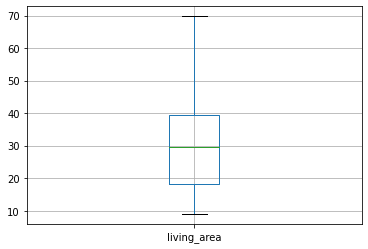

In [ ]:
#построим боксплот
data.boxplot('living_area')

Столбец очищен от выбросов. Медиана близка к среднему

In [ ]:
#посмотрим корреляцию между общей и жилой площадью
data['living_area'].corr(data['total_area'])

0.9026690374985294

Эти два показателя имеют сильную положительную корреляцию, потому логично заполнить пропуски с помощью среднего показателя коэффициента отношения жилой площади к общей.

In [ ]:
#Добавление V1

#вычислим коэффициенты отношения для строк без пропусков
data['ratio_living_total'] = data['living_area'] / data['total_area']

#вычислим средний коэффициент
avg_ratio_living_total = data['ratio_living_total'].mean()

#заполним средним  пропуски в 'living_area'
data['living_area'] = data['living_area'].fillna(data['total_area'] * avg_ratio_living_total)

#удалим временный столбец 'ratio'
data.drop(columns=['ratio_living_total'], inplace=True)

#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['living_area'].isna().sum())

Количество пропусков: 0


#### Столбец floor - этаж

In [ ]:
#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['floor'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['floor'].dtypes)
print('Количество уникальных значений:', len(data['floor'].unique()))

Количество пропусков: 0
Тип данных: int64
Количество уникальных значений: 33


<AxesSubplot:>

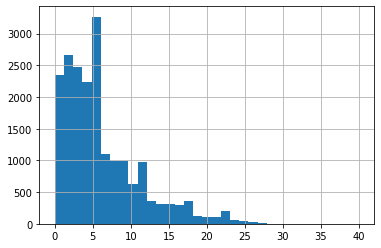

In [ ]:
data['floor'].hist(bins=33, range=(0, 40))

Здесь нет неожиданностей, данные соответствуют реальности.

#### Столбец is_apartment - апартаменты

In [ ]:
#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['is_apartment'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['is_apartment'].dtypes)
print('Количество уникальных значений:', len(data['is_apartment'].unique()))

Количество пропусков: 17662
Тип данных: object
Количество уникальных значений: 3


In [ ]:
#посмотрим уникальные значения
print(data['is_apartment'].value_counts())

False    2306
True       32
Name: is_apartment, dtype: int64


Столбец is_apartment (апартаменты, булев тип), имеющий самое большое количество пропусков, заполнялся вручную, потому здесь явно превалирует человеческий фактор. Можно предположить, что он не был выбран, тк квартира не имеет статус апартаментов, но также вполне вероятно, что часть людей, размещающих объявление, хотела скрыть данный статус, стремясь привлечь внимание к своему объявлению низкой ценой.
Есть еще варианты - столбец был добавлен не сразу, или в период сбора данных (2014-2019гг) на рынке недвижимости Санкт-Петребурга аппартаментов было очень мало, потому нужно заменить пропуски на False.

Статус апартаментов довольно сильно влияет на стоимость квартиры, его следовало бы учесть при построении модели, и очень жаль, что данных не достаточно.

In [ ]:
#заполним пропуски значением False
data['is_apartment'] = data['is_apartment'].fillna(False)
#заменим тип данных на bool
data['is_apartment'] = data['is_apartment'].astype(bool)

In [ ]:
#проверим количество уникальных значений
print(data['is_apartment'].value_counts())
print('Тип данных:', data['is_apartment'].dtypes)

False    19968
True        32
Name: is_apartment, dtype: int64
Тип данных: bool


#### Столбец studio - квартира-студия

In [ ]:
#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['studio'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['studio'].dtypes)
print('Количество уникальных значений:', len(data['studio'].unique()))

#посмотрим уникальные значения
print(data['studio'].value_counts())

Количество пропусков: 0
Тип данных: bool
Количество уникальных значений: 2
False    19877
True       123
Name: studio, dtype: int64


В данном столбце нет пропусков, в силу типа столбца (bool) нет выбросов и аномалий. Желательно бы иметь большее количество наблюдений со значением True, для анализа 116 значений - это мало.

#### Столбец open_plan - свободная планировка

In [ ]:
#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['open_plan'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['open_plan'].dtypes)
print('Количество уникальных значений:', len(data['open_plan'].unique()))

#посмотрим уникальные значения
print(data['open_plan'].value_counts())

Количество пропусков: 0
Тип данных: bool
Количество уникальных значений: 2
False    19942
True        58
Name: open_plan, dtype: int64


В данном столбце, также как и в прошлом, нет пропусков, в силу типа столбца (bool) нет выбросов и аномалий. Желательно бы иметь большее количество наблюдений со значением True, для анализа 55 значений - это очень мало.

#### Столбец kitchen_area - площадь кухни в квадратных метрах (м²)

In [ ]:
#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['kitchen_area'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['kitchen_area'].dtypes)
print('Количество уникальных значений:', len(data['kitchen_area'].unique()))

#посмотрим уникальные значения
print(data['kitchen_area'].value_counts())

Количество пропусков: 1811
Тип данных: float64
Количество уникальных значений: 784
10.000    1148
6.000     1015
8.000      982
7.000      973
9.000      959
          ... 
12.110       1
13.430       1
18.930       1
12.760       1
16.740       1
Name: kitchen_area, Length: 783, dtype: int64


Количество пропусков достаточно большое -  1771. Трудно придумать логическую замену, тк это могут быть квартиры с европланировкой - совмещенной кухней-гостиной.

Тип данных - float, соответствует целям и задачам.

In [ ]:
#посмотрим корреляцию между общей и жилой площадью
data['kitchen_area'].corr(data['total_area'])

0.42228820283723467

Корреляция 0.42 говорит о несильной взаимосвязи между площадью кухни и общей площадью.

In [ ]:
#вычислим коэффициенты отношения для строк без пропусков
data['ratio_kitchen_total'] = data['kitchen_area'] / data['total_area']

#вычислим средний коэффициент
avg_ratio_kitchen_total = data['ratio_kitchen_total'].mean()

#заполним средним  пропуски в 'living_area'
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * avg_ratio_kitchen_total)

#удалим временный столбец 'ratio'
data.drop(columns=['ratio_kitchen_total'], inplace=True)

#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['kitchen_area'].isna().sum())

Количество пропусков: 0


<AxesSubplot:>

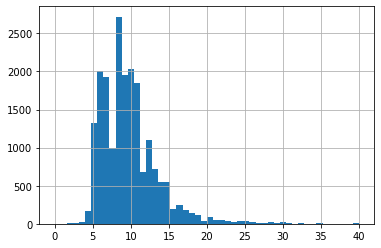

In [ ]:
#посмотрим гистограмму по данному столбцу
data['kitchen_area'].hist(bins=50, range=(0, 40))

<AxesSubplot:>

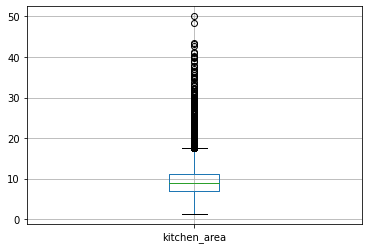

In [ ]:
#построим боксплот
data.boxplot('kitchen_area')

На гистограмме видим пологий и длинный хвост справа, после значения 19 значения имеют тенденцию к нулю, на боксплот видны выбросы значений, начиная с 18.

Минимальные значения начинаются практически от 1кв.м., что тоже является аномалией, тк по СНиП минимальный размер этого помещения равен 5 кв.м.

In [ ]:
#посмотрим описательную статистику
data['kitchen_area'].describe()

count   20000.000
mean        9.750
std         3.855
min         1.300
25%         7.000
50%         9.000
75%        11.200
max        50.000
Name: kitchen_area, dtype: float64

Максимальное значение в 50кв.м. - это аномалия, которую нужно удалить. Согласно боксплоту, выбросами будут значения более 17кв.м.

In [ ]:
#очистим от выбросов, ограничив площадь от 5 до 17
data = data.query('(5 < kitchen_area  < 17) | kitchen_area.isna()')

In [ ]:
#посмотрим описательную статистику после очистки
data['kitchen_area'].describe()

count   18548.000
mean        9.334
std         2.686
min         5.008
25%         7.000
50%         9.000
75%        11.000
max        16.920
Name: kitchen_area, dtype: float64

<AxesSubplot:>

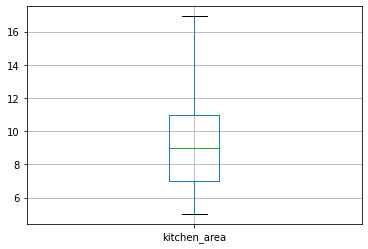

In [ ]:
#построим боксплот
data.boxplot('kitchen_area')

Данные очищены от выбросов.

#### Столбец balcony - число балконов

In [ ]:
#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['balcony'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['balcony'].dtypes)
print('Количество уникальных значений:', len(data['balcony'].unique()))
#посмотрим уникальные значения
print(data['balcony'].value_counts())

Количество пропусков: 8744
Тип данных: float64
Количество уникальных значений: 7
1.000    3314
2.000    3141
0.000    2936
5.000     235
4.000     119
3.000      59
Name: balcony, dtype: int64


В столбце balcony 7483 пропусков, при этом отсутствуют значения "0". Тут скорее имеет дело человеческий фактор - если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Это вполне соответсвует реальным [данным ЦИАН](https://www.cian.ru/novosti-zastrojschik-objasnil-pochemu-balkony-skoro-stanut-roskoshju-334586/). Такие пропуски правильно заменить на 0.

In [ ]:
#заменим пропуски на ноль
data['balcony'] = data['balcony'].fillna(0)

Тип данных float64 не корректен для числа балконов, тк их количество - всегда целое число.

In [ ]:
#преобразуем тип данных для большей наглядности
data['balcony'] = data['balcony'].astype(int)
#проверим преобразование
print(data['balcony'].dtypes)

int64


<AxesSubplot:>

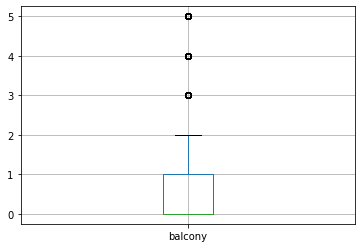

In [ ]:
#построим боксплот
data.boxplot('balcony')

In [ ]:
#посмотрим описательную статистику
data['balcony'].describe()

count   18548.000
mean        0.616
std         0.962
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         5.000
Name: balcony, dtype: float64

<AxesSubplot:>

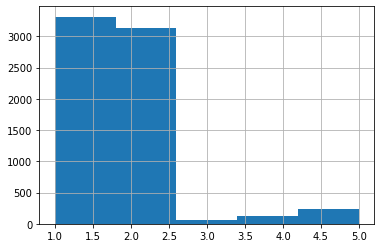

In [ ]:
data['balcony'].hist(bins=5, range=(1, 5))

Явными выбросами является количество балконов от 3 до 5. Такие объекты в действительности возможны, но тем не менее, данные нужно очистить.

In [ ]:
len(data)

18548

#### Столбец locality_name - название населённого пункта

In [ ]:
#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['locality_name'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['locality_name'].dtypes)
print('Количество уникальных значений:', len(data['locality_name'].unique()))

Количество пропусков: 35
Тип данных: object
Количество уникальных значений: 227


Количество пропусков - 27, доля от всех данных незначительна, можно удалить, тк нам очень важна локация для исследования.

In [ ]:
#удалим строки с отсутсвующим значением в столбце
data = data.dropna(subset = ['locality_name'])

In [ ]:
#проверим количество пропусков в столбце
print('Количество пропусков:', data['locality_name'].isna().sum())

Количество пропусков: 0


In [ ]:
#посмотрим уникальные значения
print(data['locality_name'].unique())

['посёлок Шушары' 'Санкт-Петербург' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино' 'Гатчина'
 'поселок Мурино' 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Всеволожск' 'Волхов' 'Кингисепп'
 'Приозерск' 'Сестрорецк' 'посёлок Аннино' 'посёлок Плодовое'
 'деревня Заклинье' 'поселок Первомайское' 'Красное Село'
 'посёлок Понтонный' 'деревня Старая' 'Павловск' 'деревня Лесколово'
 'посёлок Новый Свет' 'село Путилово' 'Ивангород' 'Шлиссельбург'
 'Никольское' 'Зеленогорск' 'поселок Новый Свет' 'деревня Оржицы'
 'деревня Кальтино' 'Кудрово' 'поселок Романовка' 'посёлок Бугры'
 'поселок Бугры' 'поселок городского типа Рощино' 'Сосновый Бор'
 'Отрадное' 'Волосово' 'посёлок Молодёжное' 'Тихвин' 'деревня Ну

Среди уникальных имен встречаются неявные дуликаты типа:

'поселок городского типа Рощино'-'городской посёлок Рощино'-'посёлок городского типа Рощино';

'поселок Лесное'-'коттеджный посёлок Лесное';

'село Павлово'-'городской посёлок Павлово'-'посёлок городского типа Павлово';

'деревня Кудрово'-'Кудрово';

'посёлок Щеглово'-'деревня Щеглово';

'посёлок Мурино'-'поселок Мурино'-'Мурино';

'поселок станции Приветнинское'-'посёлок при железнодорожной станции Приветнинское

В этих строках нужно заменить букву "ё" на "е", а также удалить виды населённых пунктов, оставив только имя населенного пункта.

In [ ]:
#заменим букву "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=False)

# удалим лишние слова
data['locality_name'] = data['locality_name'].str.replace(r'\b(село|деревня|поселок|городской|городского типа|станции|коттеджный|при железнодорожной станции)\b', '', regex=True)

# удалим лишние пробелы
data['locality_name'] = data['locality_name'].str.strip()

#проверим, сколько уникальных имен после преобразования
print('Количество уникальных значений:', len(data['locality_name'].unique()))

Количество уникальных значений: 189


In [ ]:
#посмотрим уникальные значения
print(data['locality_name'].unique())

['Шушары' 'Санкт-Петербург' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино' 'Гатчина'
 'Федоровское' 'Выборг' 'Кронштадт' 'Кировск' 'Новое Девяткино'
 'Металлострой' 'Сиверский' 'Молодцово' 'Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Всеволожск' 'Волхов' 'Кингисепп'
 'Приозерск' 'Сестрорецк' 'Аннино' 'Плодовое' 'Заклинье' 'Первомайское'
 'Красное Село' 'Понтонный' 'Старая' 'Павловск' 'Лесколово' 'Новый Свет'
 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Оржицы'
 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Сосновый Бор' 'Отрадное'
 'Волосово' 'Молодежное' 'Тихвин' 'Нурма' 'Стрельна' 'Терволово' 'Куттузи'
 'Подпорожье' 'Токсово' 'Тосно' 'Кипень' 'Вартемяги' 'Тельмана'
 'Новогорелово' 'Лаголово' 'Цвелодубово' 'Белогорка' 'Новоселье'
 'Большие Колпаны' 'Горбунки' 'Кириши' 'Заневка' 'Мистолово'
 'Новая Ладога' 'имени Свердлова' 'Пеники' 'Бегуницы' 'Синявино' 'Колтуши'
 'Низино' 'Гостилицы' 'Малое Карлино' 

Распределение для данного столбца сделать некорректно, тк тип данных object

In [ ]:
#но мы можем посмотреть количество уникальных значений
data['locality_name'].value_counts(ascending=False)

Санкт-Петербург    12690
Мурино               507
Шушары               409
Кудрово              396
Всеволожск           352
                   ...  
Снегиревка             1
Подпорожье             1
Лампово                1
Громово                1
Большое Рейзино        1
Name: locality_name, Length: 189, dtype: int64

#### Столбец days_exposition - сколько дней было размещено объявление (от публикации до снятия)

In [ ]:
#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['days_exposition'].isna().sum())
#проверим тип данных в столбце
print('Тип данных:', data['days_exposition'].dtypes)
print('Количество уникальных значений:', len(data['days_exposition'].unique()))

#посмотрим уникальные значения
print(data['days_exposition'].value_counts())

Количество пропусков: 2189
Тип данных: float64
Количество уникальных значений: 1049
45.000      680
60.000      480
7.000       195
30.000      178
4.000       148
           ... 
828.000       1
1226.000      1
1265.000      1
863.000       1
1131.000      1
Name: days_exposition, Length: 1048, dtype: int64


Количество пропусков: 1930. Предположительно, эти объявления были не закрыты на конец периода данных, потому не подлежат удалению или логической замене.

Для количества дней больше подходит тип данных int, но наличие пропусков не дает изменить с текущего float

<AxesSubplot:>

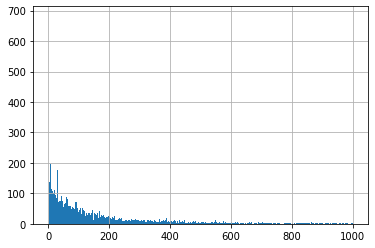

In [ ]:
#посмотрим гистограмму по данному столбцу
data['days_exposition'].hist(bins=1000, range=(0, 1000))

Гистограмма похожа на распределение Пуассона, описывающее число событий в единицу времени.

In [ ]:
#посмотрим описательную статистику
data['days_exposition'].describe()

count   16324.000
mean      170.793
std       209.384
min         1.000
25%        43.000
50%        90.000
75%       216.000
max      1580.000
Name: days_exposition, dtype: float64

Среднее значение 173.964 значительно отличается от медианы в 94.000.

Минимальное значение 1 день, а максимальное 1553 (4 года). Вероятнее всего, последнее наблюдение аномальное - за один день можно найти покупателей, если объект с адекватной ценой в очень популярном месте, но 4 года размещения объявления совпадают с временным периодом датасета, скорее всего это неактуальное объявление, которое забыли снять с публикации.

<AxesSubplot:>

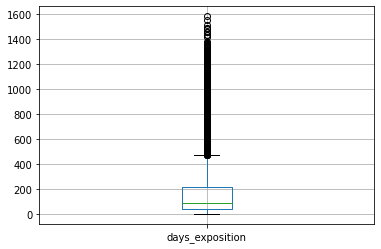

In [ ]:
#построим боксплот
data.boxplot('days_exposition')

По данным боксплота выбросами будут размещения около 500 дней.

In [ ]:
data = data.query('days_exposition  <= 500 | days_exposition.isna()')

In [ ]:
#посчитаем количество пропусков в столбце
print('Количество пропусков:', data['days_exposition'].isna().sum())

Количество пропусков: 2189


In [ ]:
#посмотрим описательную статистику
data['days_exposition'].describe()

count   15093.000
mean      123.442
std       117.372
min         1.000
25%        39.000
50%        80.000
75%       175.000
max       500.000
Name: days_exposition, dtype: float64

<AxesSubplot:>

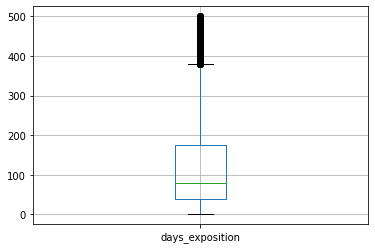

In [ ]:
#построим боксплот
data.boxplot('days_exposition')

Путем перебора понизила планку отсечения выбросов - с каждым понижением уменьшалось среднее значение, но и медиана уменьшалась, и все ниже опускался 75 процентиль. Решила остановиться на отметке 365 дней. Получается, в исследовани будут учитываться продажи объявлений, бывших в размещении не более 1 года.

#### Столбцы с картографическими данными

В изначальном датасете есть несколько столбцов данных, сгенерированных на основе картографических данных. Это:

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

cityCenters_nearest — расстояние до центра города (м)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

На этапе обзора в картографических данных было много пропусков, причем в нескольких столбцах их доля была примерно одинаковой (получается две группы - 4 столбца примерно по 23% и два столбца по 60+ %).


airports_nearest        23.38

city_сenters_nearest    23.29

parks_around3000        23.28

ponds_around3000        23.28

parks_nearest           65.91

ponds_nearest           61.56

Логично предположить, что это полностью не заполненные строки в силу технического сбоя (почему-то для этих строк не было рассчитано расстояние). Потому проверим для начала, верна ли гипотеза, что эти пропуски сочетаются между собой по столбцам.

In [ ]:
#и посчитаем количество пропусков, оставшихся после обработки других столбцов
data[['airports_nearest',
      'city_centers_nearest',
      'parks_around3000',
      'parks_nearest',
      'ponds_around3000',
      'ponds_nearest'
     ]].isna().sum().sort_values(ascending=False)

parks_nearest           11598
ponds_nearest           10786
airports_nearest         3457
city_centers_nearest     3444
parks_around3000         3443
ponds_around3000         3443
dtype: int64

In [ ]:
#выведем тридцать строк среза по  этим столбцам (с именем локации)
data[['locality_name',
      'airports_nearest',
      'city_centers_nearest',
      'parks_around3000',
      'parks_nearest',
      'ponds_around3000',
      'ponds_nearest'
     ]].head(20)

,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
1,Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN
5,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN
6,Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN
8,Мурино,NaN,NaN,NaN,NaN,NaN,NaN
9,Санкт-Петербург,50898.000,15008.000,0.000,NaN,0.000,NaN
10,Санкт-Петербург,38357.000,13878.000,1.000,310.000,2.000,553.000
11,Ломоносов,48252.000,51677.000,0.000,NaN,0.000,NaN
12,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN
13,Петергоф,37868.000,33058.000,1.000,294.000,3.000,298.000
14,Пушкин,20782.000,30759.000,0.000,NaN,1.000,96.000


Гипотеза подтвердилась: если хотя бы в одном столбце есть пропуск, другие столбцы тоже не заполнены. Стоит обратиться к техническим специалистам с просьбой разобраться, почему эти данные отсутсвуют и как их можно получить, но вполне вероятно, что проблема была устранена.

Предлагаю заполнить эти пропуски медианными значениями других объектов на основе совпадения наименования локации. Думаю, это некритично повлияет на статистическое распределение.


Также есть пропуски в столбцах ponds_nearest и parks_nearest при значении ноль в ponds_around3000 и parks_around3000 соответсвенно. Это вполне объяснимо - если в радиусе 3км поблизости нет водоема или парка, то невозможно определить расстояние для него (заполнять нулем не корректно). Потому эти пропуски останутся без изменений

In [ ]:
#
data[['airports_nearest',
      'city_centers_nearest',
      'parks_around3000',
      'parks_nearest',
      'ponds_around3000',
      'ponds_nearest'
     ]].isna().sum().sort_values(ascending=False)

parks_nearest           11598
ponds_nearest           10786
airports_nearest         3457
city_centers_nearest     3444
parks_around3000         3443
ponds_around3000         3443
dtype: int64

Количество пропусков осталось прежним.


In [ ]:
#выведем тридцать строк среза по  этим столбцам (с именем локации)
data[['locality_name',
      'airports_nearest',
      'city_centers_nearest',
      'parks_around3000',
      'parks_nearest',
      'ponds_around3000',
      'ponds_nearest'
     ]].head(20)

,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
1,Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN
5,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN
6,Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN
8,Мурино,NaN,NaN,NaN,NaN,NaN,NaN
9,Санкт-Петербург,50898.000,15008.000,0.000,NaN,0.000,NaN
10,Санкт-Петербург,38357.000,13878.000,1.000,310.000,2.000,553.000
11,Ломоносов,48252.000,51677.000,0.000,NaN,0.000,NaN
12,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN
13,Петергоф,37868.000,33058.000,1.000,294.000,3.000,298.000
14,Пушкин,20782.000,30759.000,0.000,NaN,1.000,96.000


Но надо заметить, что не во всех локациях удалось вычислить медиану, тк не нашлось аналогичных объектов.

Не все строки удалось заполнить, тк не нашлось таких же локаций с заполненными картографическими столбцами.

In [ ]:
#выведем статистику по данным столбцам
data[['airports_nearest',
      'city_centers_nearest',
      'parks_around3000',
      'parks_nearest',
      'ponds_around3000',
      'ponds_nearest'
     ]].describe()

,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
count,13825.000,13838.000,13839.000,5684.000,13839.000,6496.000
mean,29130.330,15108.951,0.543,487.810,0.682,537.385
std,13099.749,8177.047,0.750,325.191,0.872,274.326
min,0.000,329.000,0.000,1.000,0.000,13.000
25%,17863.000,10914.000,0.000,291.000,0.000,325.000
50%,27734.000,13749.000,0.000,456.000,0.000,526.000
75%,38222.000,16685.000,1.000,613.000,1.000,746.000
max,84853.000,65952.000,3.000,3190.000,3.000,1344.000


Остались пропуски в данных ponds_nearest, parks_nearest, airports_nearest, city_centers_nearest.

#### **Предварительный вывод**

Проведен обзор базы данных, найдены и изучены пропущенные значения в столбцах, заполнены пропущенные значения, где это возможно, рассмотрены типы данных в каждом столбце, изменены last_price, first_day_exposition, rooms, floor, balcony на тип int. Изучить уникальные значения в столбце с названиями и устранены неявные дубликаты. Найдены и устранены редкие и аномальные значения.

Очищенные данные содержат следующие значения:

- total_images - от 0 до 24 фотографий
- last_price - от 2006000 до 14970000 рублей
- total_area - от 20 до 104 кв.м.
- rooms - от 1 до 5 комнат
- ceiling_height - от 2,25 до 3,4 метров
- floors_total - от 1 до 35 этажей
- living_area - от 9 до 69.7 кв.м.
- floor - от 1 до 33 этажа
- kitchen_area - от 5 до 16.92 кв.м.
- balcony - от 0 до 2 балконов
- city_centers_nearest - от 329 до 64857 метров
- days_exposition - от 1 до 364 дней

### Добавление в таблицу новых столбцов

Добавим в таблицу новые столбцы со следующими параметрами:

- цена одного квадратного метра;

- день недели, месяц и год публикации объявления;

- тип этажа квартиры (значения — «первый», «последний», «другой»);

- расстояние до центра города в километрах.

#### Цена одного квадратного метра

In [ ]:
#создадим столбец и посчитаем стоимость квадратного метра
#с округлением до двух знаков после запятой.
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)

In [ ]:
#посмотрим сводную статистику
data['price_square_meter'].describe()

count    17282.000
mean     96417.951
std      26955.483
min      24733.270
25%      79395.455
50%      95000.000
75%     111250.000
max     387096.770
Name: price_square_meter, dtype: float64

Минимальная стоимость квадратного метра 26250 рублей, максимальная в десять раз больше - 286538 рублей. Медиана и среднее около 95000 рублей.

#### День недели, месяц и год публикации объявления

In [ ]:
#создадим и заполним столбец с днем недели публикации объявления
data['first_exposition_weekday'] = data['first_day_exposition'].dt.weekday
#создадим и заполним столбец с месяцем публикации объявления
data['first_exposition_month'] = data['first_day_exposition'].dt.month
#создадим и заполним столбец с годом публикации объявления
data['first_exposition_year'] = data['first_day_exposition'].dt.year

In [ ]:
#посмотрим распределение по дням недели
data['first_exposition_weekday'].value_counts()

3    3068
1    3036
4    2959
2    2894
0    2643
5    1410
6    1272
Name: first_exposition_weekday, dtype: int64

Чаще всего объявления размещали в четверг, вторник и пятницу. Реже - в субботу и воскресенье (в выходные дни) и понедельник, что говорит о том, что к продаже недвижимости обычно подходят серьезно и неторопливо/взвешено.

In [ ]:
data['first_exposition_month'].value_counts()

2     1956
3     1879
4     1792
11    1757
10    1593
9     1439
8     1307
6     1252
7     1200
12    1142
1     1078
5      887
Name: first_exposition_month, dtype: int64

Больше всего объявлений размещалось в ноябре и феврале. Меньше всего в декабре-январе и мае - возможно, это связано с большим количеством праздников (период отпусков, длинных выходных дней).

In [ ]:
data['first_exposition_year'].value_counts()

2018    6749
2017    6194
2019    2278
2016    1678
2015     376
2014       7
Name: first_exposition_year, dtype: int64

Больше всего объявлений за 2018 год, чуть меньше за 2017, и еще меньше за 2016 и 2015.
Данные по годам отражают, скорее, рост числа пользователей сервиса объявлений - в 2015-2018 годах виден рост количества публикаций. Данные за 2019 год представлены только за четыре месяца, потому выводы о росте или спаде рынка предложений недвижимости делать некорректно.

#### Тип этажа квартиры

In [ ]:
#создадим функцию, определяющую категории в соответствии с этажом квартиры
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'first'
    elif floor == floors_total:
        return 'last'
    else:
        return 'other'

#применим функцию, заполнив новый столбец
data['floor_category'] = data.apply(floor_type, axis=1)
#проверим, как сработал код
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,first_exposition_weekday,first_exposition_month,first_exposition_year,floor_category
1,7,3350000,40.400,2018-12-04,1,2.600,11.000,18.600,1,False,False,False,11.000,2,Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000,82920.790,1,12,2018,first
5,10,2890000,30.400,2018-09-10,1,2.600,12.000,14.400,5,False,False,False,9.100,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000,95065.790,0,9,2018,other
6,6,3700000,37.300,2017-11-02,1,2.600,26.000,10.600,6,False,False,False,14.400,1,Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000,99195.710,3,11,2017,other


In [ ]:
data['floor_category'].value_counts()

other    13151
last      2133
first     1998
Name: floor_category, dtype: int64

По количеству объявлений лидирует категория "other" (другой), что логично, тк "первых" и "последних" гораздо меньше, чем средних этажей.

####  Расстояние до центра города в километрах.

In [ ]:
#посчитаем расстояние до центра города в километрах и округлим до целого числа
data['center_distance'] = round(data['city_centers_nearest'] / 1000)

In [ ]:
#проверим, как отработал код
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,first_exposition_weekday,first_exposition_month,first_exposition_year,floor_category,center_distance
1,7,3350000,40.400,2018-12-04,1,2.600,11.000,18.600,1,False,False,False,11.000,2,Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000,82920.790,1,12,2018,first,19.000
5,10,2890000,30.400,2018-09-10,1,2.600,12.000,14.400,5,False,False,False,9.100,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000,95065.790,0,9,2018,other,NaN
6,6,3700000,37.300,2017-11-02,1,2.600,26.000,10.600,6,False,False,False,14.400,1,Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000,99195.710,3,11,2017,other,19.000
8,20,2900000,33.160,2018-05-23,1,2.600,27.000,15.430,26,False,False,False,8.810,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000,87454.760,2,5,2018,other,NaN
9,18,5400000,61.000,2017-02-26,3,2.500,9.000,43.600,7,False,False,False,6.500,2,Санкт-Петербург,50898.000,15008.000,0.000,NaN,0.000,NaN,289.000,88524.590,6,2,2017,other,15.000


In [ ]:
#посмотрим распределение по удаленности от центра
data['center_distance'].describe()

count   13838.000
mean       15.106
std         8.182
min         0.000
25%        11.000
50%        14.000
75%        17.000
max        66.000
Name: center_distance, dtype: float64

<AxesSubplot:>

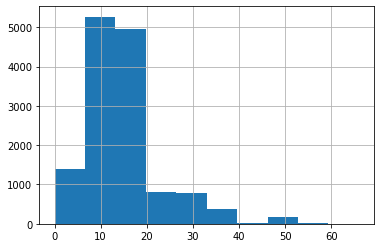

In [ ]:
data['center_distance'].hist()

Большинство продаваемых квартир находятся на удалении 15 км. Около 1000 объектов находятся в центре, по мере удаленности от центра растет число продаваемых объектов до расстояния в 20 км, затем число продаваемых квартир начинает меньшаться. Максимально удаленный от центра продаваемый объект находится на расстоянии 65 км.

### Исследовательский анализ данных

Проведем исследовательский анализ данных:

1. Изучим следующие параметры объектов:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

2. Построим отдельные гистограммы для каждого из этих параметров. Опишем все наблюдения по параметрам в ячейке с типом markdown.

#### Общая площадь

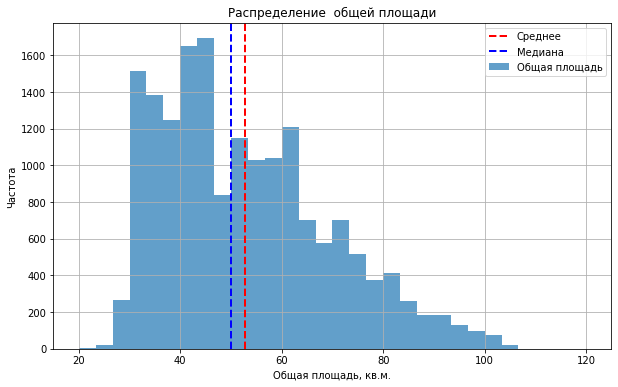

In [ ]:
#вычисление среднего и медианы
mean_value = data['total_area'].mean()
median_value = data['total_area'].median()

#построение гистограммы
plt.figure(figsize=(10, 6))  # Размер графика
data['total_area'].hist(bins=30, range=(20, 120), alpha=0.7, label='Общая площадь')

#добавление линий для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавление лейблов и подписей
plt.title('Распределение  общей площади')  # Заголовок
plt.xlabel('Общая площадь, кв.м.')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

#показ графика
plt.show()

Распределение немного несимметрично, разнообразно, с наличием как малых, так и больших квартир.
Минимальная жилая площадь составляет 20 кв.м. Максимальная жилая площадь составляет 104.8 кв.м.
Большая часть квартир находится в диапазоне от 30 до 62 кв.м.

#### Жилая площадь

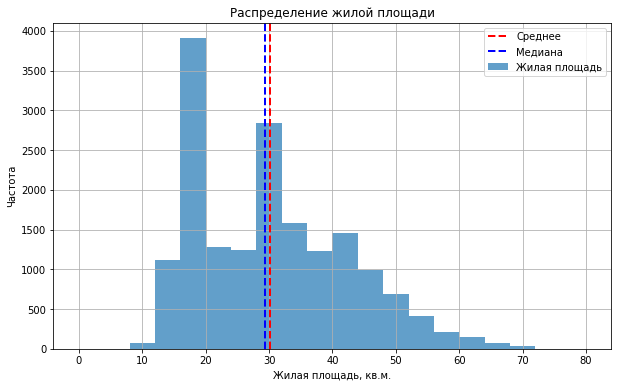

In [ ]:
#вычисление среднего и медианы
mean_value = data['living_area'].mean()
median_value = data['living_area'].median()

#построение гистограммы
plt.figure(figsize=(10, 6))  # Размер графика
data['living_area'].hist(bins=20, range=(0, 80), alpha=0.7, label='Жилая площадь')

#добавление линий для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавление лейблов и подписей
plt.title('Распределение жилой площади')  # Заголовок
plt.xlabel('Жилая площадь, кв.м.')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

# Показ графика
plt.show()

Распределение жилых площадей в данном наборе данных показывает разнообразие, с наличием как малых, так и относительно больших квартир (много квартир 15-20 кв.м., а также 30-35 кв.м.). Большая часть квартир (75%) находится в диапазоне от 18 до 38 кв.м. Медиана и среднее около 30кв.м.

#### Площадь кухни

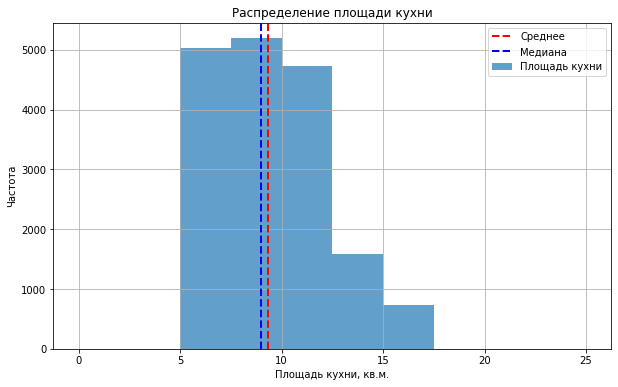

In [ ]:
#вычисление среднего и медианы
mean_value = data['kitchen_area'].mean()
median_value = data['kitchen_area'].median()

#построение гистограммы
plt.figure(figsize=(10, 6))  # Размер графика
data['kitchen_area'].hist(bins=10, range=(0, 25), alpha=0.7, label='Площадь кухни')

#добавление линий для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавление лейблов и подписей
plt.title('Распределение площади кухни')  # Заголовок
plt.xlabel('Площадь кухни, кв.м.')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

# Показ графика
plt.show()

Распределение площадей кухонь в данном наборе данных показывает разнообразие, с наличием как малых, так и относительно больших кухонь. Большая часть кухонь находится в диапазоне от 7 до 11 кв.м

#### Цена объекта

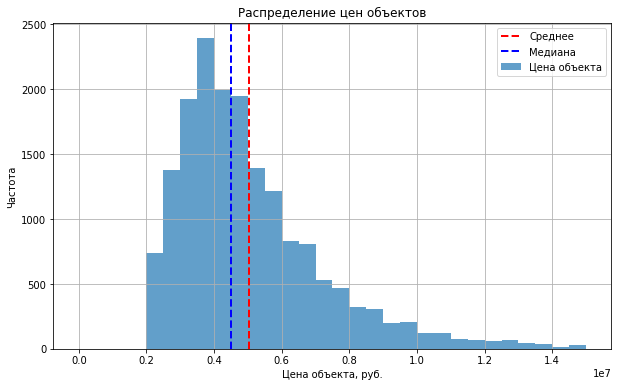

In [ ]:
#вычисление среднего и медианы
mean_value = data['last_price'].mean()
median_value = data['last_price'].median()

#построение гистограммы
plt.figure(figsize=(10, 6))  # Размер графика
data['last_price'].hist(bins=30, range=(0, 15000000), alpha=0.7, label='Цена объекта')

#добавление линий для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавление лейблов и подписей
plt.title('Распределение цен объектов')  # Заголовок
plt.xlabel('Цена объекта, руб.')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

# Показ графика
plt.show()

Средняя цена составляет примерно 4,912,491. Большая часть квартир (75%) находится в диапазоне от 3,500,000 до 5,800,000.

#### Количество комнат

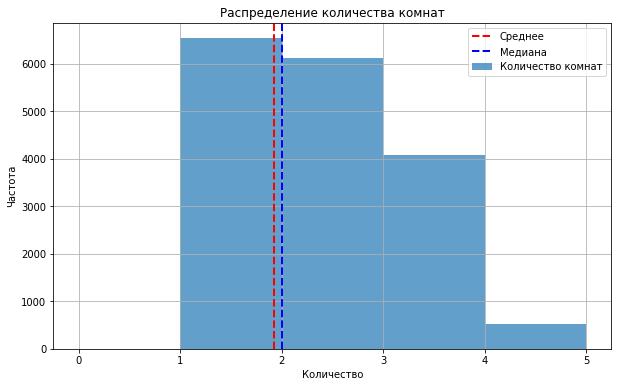

In [ ]:
#вычисление среднего и медианы
mean_value = data['rooms'].mean()
median_value = data['rooms'].median()

#построение гистограммы
plt.figure(figsize=(10, 6))  # Размер графика
data['rooms'].hist(bins=5, range=(0, 5), alpha=0.7, label='Количество комнат')

#добавление линий для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавление лейблов и подписей
plt.title('Распределение количества комнат')  # Заголовок
plt.xlabel('Количество')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

# Показ графика
plt.show()

Распределение количества комнат показывает, что большинство квартир являются небольшими, с преобладанием однокомнатных и двухкомнатных квартир.

#### Высота потолков

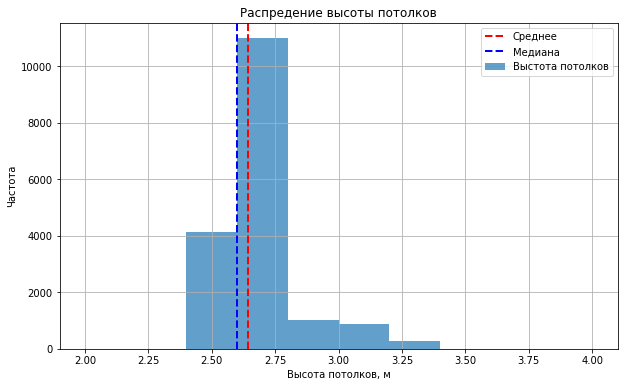

In [ ]:
#вычисление среднего и медианы
mean_value = data['ceiling_height'].mean()
median_value = data['ceiling_height'].median()

#построение гистограммы
plt.figure(figsize=(10, 6))  # Размер графика
data['ceiling_height'].hist(bins=10, range=(2, 4), alpha=0.7, label='Выстота потолков')

#добавление линий для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавление лейблов и подписей
plt.title('Распредение высоты потолков')  # Заголовок
plt.xlabel('Высота потолков, м')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

# Показ графика
plt.show()

Большая часть квартир (75%) имеет высоту потолков 2.75 метра или меньше, с наличием некоторого количества квартир с высокими потолками.

#### Этаж квартиры

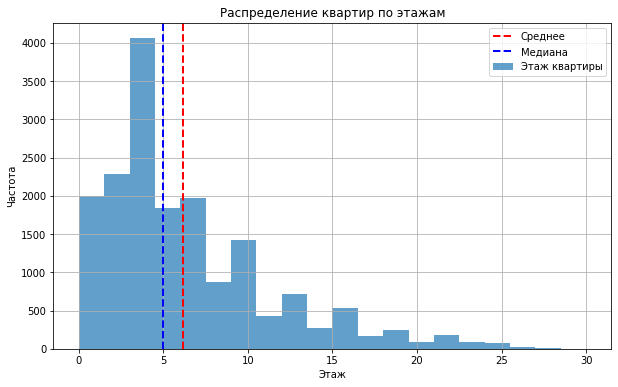

In [ ]:
#вычисление среднего и медианы
mean_value = data['floor'].mean()
median_value = data['floor'].median()

#построение гистограммы
plt.figure(figsize=(10, 6))  # Размер графика
data['floor'].hist(bins=20, range=(0, 30), alpha=0.7, label='Этаж квартиры')

#добавление линий для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавление лейблов и подписей
plt.title('Распределение квартир по этажам')  # Заголовок
plt.xlabel('Этаж')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

# Показ графика
plt.show()

Гистограмма скошена вправо (имеет длинный хвост в сторону высоких этажей). Большинство продаваемых квартир расположены на этажах ниже 9, что говорит о том, что преобладает вторичный рынок жилья в районах старой застройки, и полявляются предложения в домах выше 9 этажей (это явно новое жилье/первичные предложения).

#### Тип этажа квартиры

In [ ]:
#посчитаем
data['floor_category'].value_counts()

other    13151
last      2133
first     1998
Name: floor_category, dtype: int64

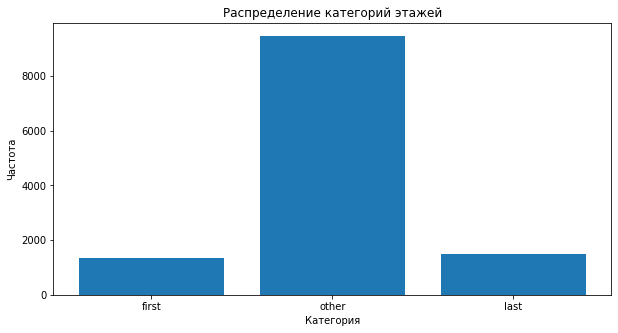

In [ ]:
#создадим списки категорий и частот
categories = ['first', 'other', 'last']
categories_count = [1340, 9463, 1509]

#построим гистограмму
plt.figure(figsize=(10, 5))
plt.bar(categories, categories_count)

#добавим подписи
plt.title('Распределение категорий этажей')
plt.xlabel('Категория')
plt.ylabel('Частота')

#выведем график
plt.show()

Очевидно, что предложений по средним этажам больше, чем по первым и последним, тк средних этажей в рамках одного дома меньше, чем первых и последних по отдельности

#### Общее количество этажей в доме

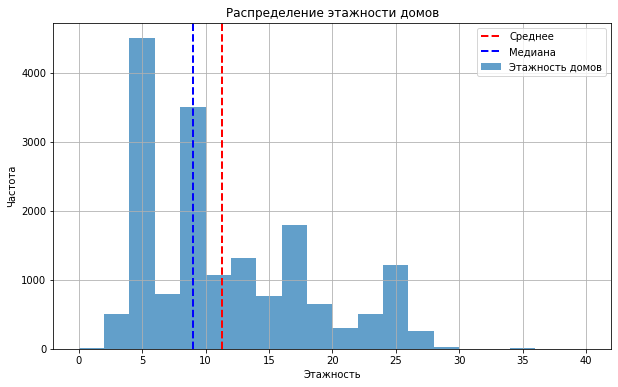

In [ ]:
#вычислим среднее и медиану
mean_value = data['floors_total'].mean()
median_value = data['floors_total'].median()

#построим гистограмму
plt.figure(figsize=(10, 6))  # Размер графика
data['floors_total'].hist(bins=20, range=(0, 40), alpha=0.7, label='Этажность домов')

#добавим линии для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавим подписи
plt.title('Распределение этажности домов')  # Заголовок
plt.xlabel('Этажность')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

# Показ графика
plt.show()

На гистограмме виден значительный разброс этажей, что говорит о разнообразии в типах зданий. Большая часть зданий имеет количество этажей 16 и ниже. Четверть всех зданий в наборе данных имеют 4 этажа или меньше.


#### Расстояние до центра города в метрах

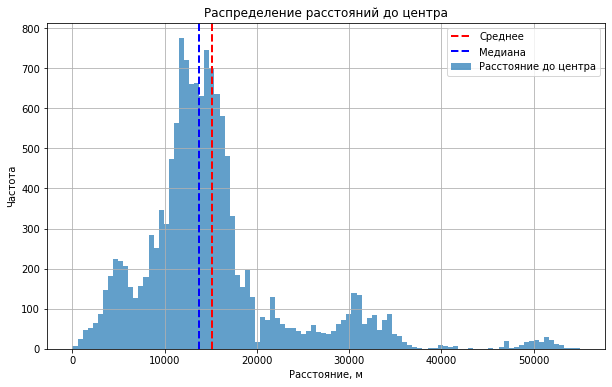

In [ ]:
#вычислим среднее и медиану
mean_value = data['city_centers_nearest'].mean()
median_value = data['city_centers_nearest'].median()

#пострим гистограмму
plt.figure(figsize=(10, 6))  # Размер графика
data['city_centers_nearest'].hist(bins=100, range=(0, 55000), alpha=0.7, label='Расстояние до центра')

#добавим линий для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавим подписи
plt.title('Распределение расстояний до центра')  # Заголовок
plt.xlabel('Расстояние, м')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

#вывод графика
plt.show()

Большая часть квартир находится на расстоянии 16,605 километров.

#### Расстояние до ближайшего аэропорта

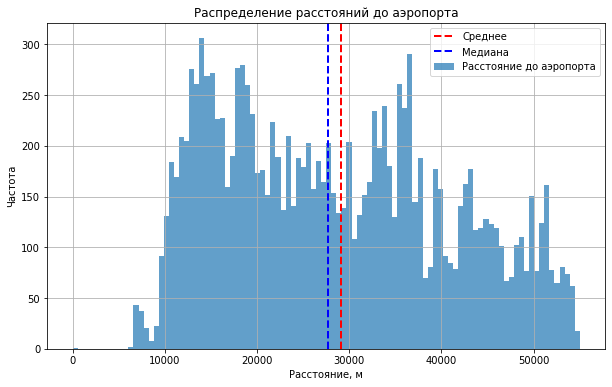

In [ ]:
#вычислим среднее и медиану
mean_value = data['airports_nearest'].mean()
median_value = data['airports_nearest'].median()

#построим гистограмму
plt.figure(figsize=(10, 6))  # Размер графика
data['airports_nearest'].hist(bins=100, range=(0, 55000), alpha=0.7, label='Расстояние до аэропорта')

#добавим линии для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавим подписи
plt.title('Распределение расстояний до аэропорта')  # Заголовок
plt.xlabel('Расстояние, м')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

#выведем график
plt.show()

Большая часть квартир находится на расстоянии 30000 метров

#### Расстояние до ближайшего парка

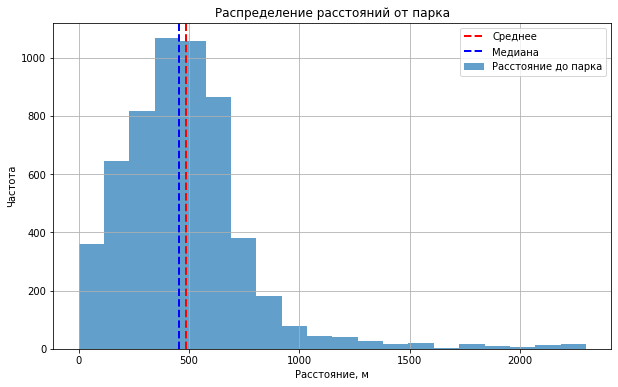

In [ ]:
#вычислим среднее и медиану
mean_value = data['parks_nearest'].mean()
median_value = data['parks_nearest'].median()

#построим гистограмму
plt.figure(figsize=(10, 6))  # Размер графика
data['parks_nearest'].hist(bins=20, range=(0, 2300), alpha=0.7, label='Расстояние до парка')

#добавим линии для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавим подписи
plt.title('Распределение расстояний от парка')  # Заголовок
plt.xlabel('Расстояние, м')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

#выведем график
plt.show()

Продаваемые объекты расположены на различных расстояниях от парков, с преобладанием объектов, находящихся на расстоянии до 500 метров.

#### День и месяц публикации объявления

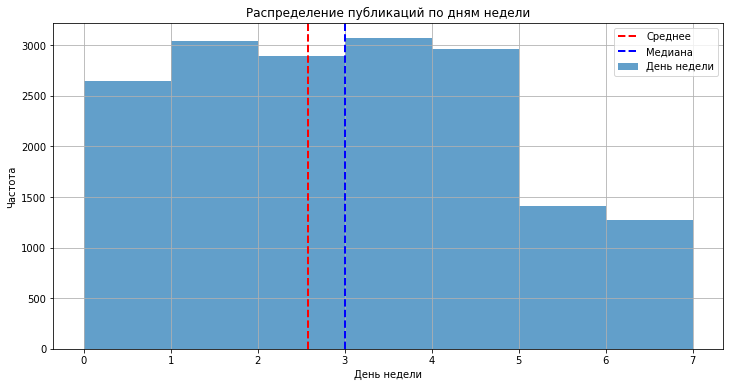

In [ ]:
#вычислим среднее и медиану
mean_value = data['first_exposition_weekday'].mean()
median_value = data['first_exposition_weekday'].median()

#построим гистограмму
plt.figure(figsize=(12, 6))  # Размер графика
data['first_exposition_weekday'].hist(bins=7, range=(0, 7), alpha=0.7, label='День недели')

#добавим линии для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавим подписи
plt.title('Распределение публикаций по дням недели')  # Заголовок
plt.xlabel('День недели')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

#выведем график
plt.show()

Как было отмечено ранее, чаще всего объявления размещали со вторника по пятницу. Реже - в субботу и воскресенье (в выходные дни).

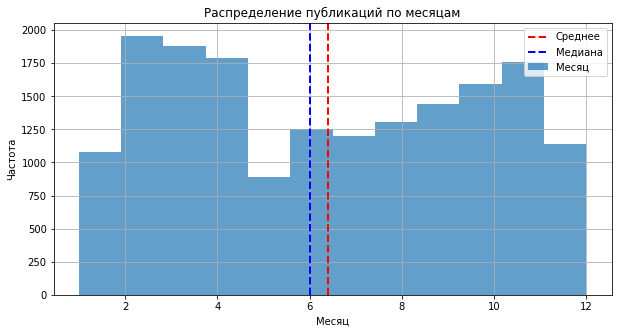

In [ ]:
#вычислим среднее и медиану
mean_value = data['first_exposition_month'].mean()
median_value = data['first_exposition_month'].median()

#построим гистограмму
plt.figure(figsize=(10, 5))  # Размер графика
data['first_exposition_month'].hist(bins=12, range=(1, 12), alpha=0.7, label='Месяц')

#добавим линии для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавим лейблов подписи
plt.title('Распределение публикаций по месяцам')  # Заголовок
plt.xlabel('Месяц')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

#выведем график
plt.show()

Больше всего объявлений размещалось в ноябре и феврале. Меньше всего в декабре-январе и мае - возможно, это связано с большим количеством праздников (период отпусков, длинных выходных дней).

#### Продолжительность экспозиции

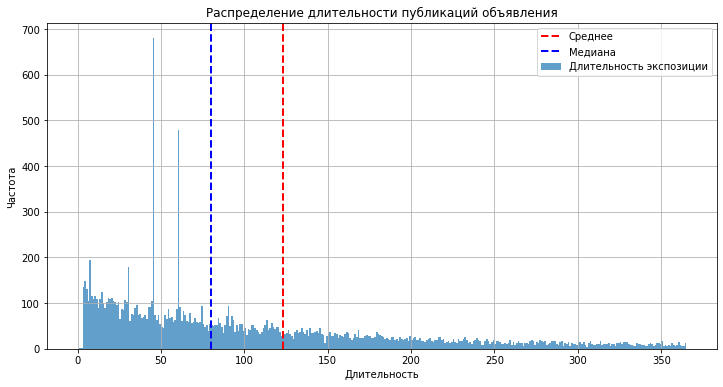

In [ ]:
#построим гистограмму
#вычислим среднее и медиану
mean_value = data['days_exposition'].mean()
median_value = data['days_exposition'].median()

#построим гистограмму
plt.figure(figsize=(12, 6))  # Размер графика
data['days_exposition'].hist(bins=365, range=(0, 365), alpha=0.7, label='Длительность экспозиции')

#добавим линии для среднего и медианы
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Медиана')

#добавим подписи
plt.title('Распределение длительности публикаций объявления')  # Заголовок
plt.xlabel('Длительность')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.legend()  # Легенда

#выведем график
plt.show()

<AxesSubplot:>

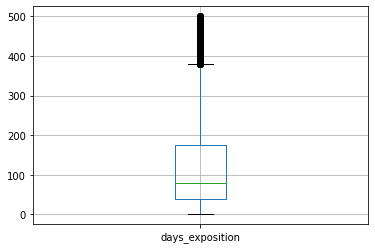

In [ ]:
#построим боксплот
data.boxplot('days_exposition')

In [ ]:
data['days_exposition'].describe()

count   15093.000
mean      123.442
std       117.372
min         1.000
25%        39.000
50%        80.000
75%       175.000
max       500.000
Name: days_exposition, dtype: float64

Четверть объектов находятся на продаже менее 34 дней - это очень быстрые продажи.

Медиана срока размещения говорит о том, что половина объявлений были сняты на 74 день с моменты публикации, а среднее количество дней, в течение которых объекты находились на продаже, составляет примерно 103.94 дня. Примем за нормальный (не быстрый и не медленный) срок продажи - от 74 до 103 дней (примерно от двух до трех месяцев).
Большая часть объектов (75%) продается за 154 дней или меньше, то есть долгими продажами будем считать более 150 дней (от 5 месяцев).

#### Корреляция

Исследуем взаимосвязь данных. Изучим факторы, которые по гипотезам больше всего влияют на общую (полную) стоимость объекта:
- общая площадь;

- жилая площадь;

- площадь кухни;

- количество комнат;

- этаж, на котором расположена квартира (первый, последний, другой);

- дата размещения (день недели, месяц, год).

In [ ]:
data.head(0)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,first_exposition_weekday,first_exposition_month,first_exposition_year,floor_category,center_distance


In [ ]:
#построим матрицу корреляции Пирсона для выбранных столбцов
correlation_matrix = data[[
    'total_area',
    'living_area',
    'kitchen_area',
    'last_price',
    'center_distance',
    'days_exposition'
]].corr(method='pearson')
print(correlation_matrix['last_price'])

total_area         0.692
living_area        0.582
kitchen_area       0.463
last_price         1.000
center_distance   -0.328
days_exposition    0.043
Name: last_price, dtype: float64


По данным матрицы прослеживается положительная корреляция цены с общей площадью, жилой площадью и количеством комнат, присутствует отрицательная корреляция с расстоянием от центра.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

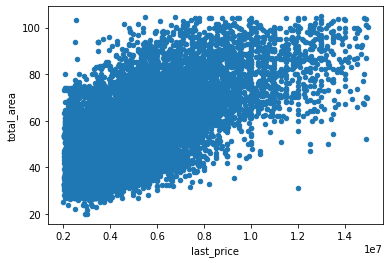

In [ ]:
#построим диаграмму рассеяния scatter plot для общей площади
data.plot(x='last_price', y='total_area', kind='scatter')

Сильная положительная корреляция цены объекта и общей площади подтвердилась.

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

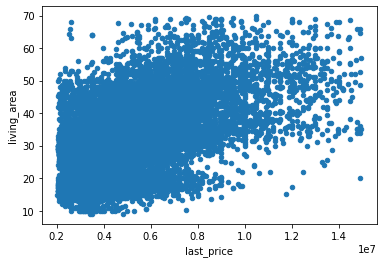

In [ ]:
#построим диаграмму рассеяния scatter plot для жилой площади
data.plot(x='last_price', y='living_area', kind='scatter')

Также на лицо сильная зависимость цены от жилой площади.

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

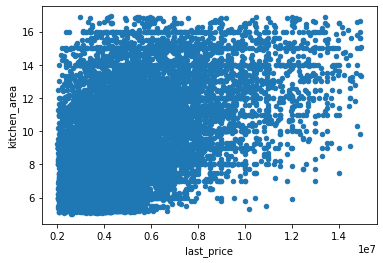

In [ ]:
#построим диаграмму рассеяния scatter plot для площади кухни
data.plot(x='last_price', y='kitchen_area', kind='scatter')

Прослеживается корреляция цены объекта и площади кухни.

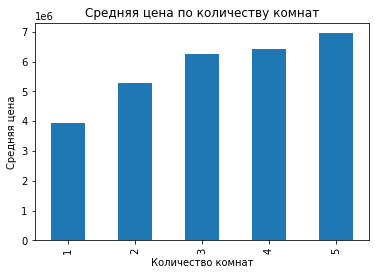

In [ ]:
# построим столбчатую диаграмму для оценки взаимосвязи цены и количества комнат
average_prices = data.groupby('rooms')['last_price'].mean()
average_prices.plot(kind='bar')
plt.title('Средняя цена по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')
plt.show()

По графику видна зависимость - чем больше комнат, тем выше средняя цена.

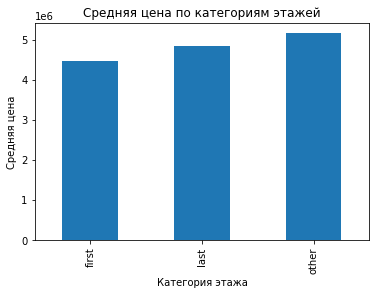

In [ ]:
# построим столбчатую диаграмму для оценки взаимосвязи цены и категории этажа
average_prices = data.groupby('floor_category')['last_price'].mean()
average_prices.plot(kind='bar')
plt.title('Средняя цена по категориям этажей')
plt.xlabel('Категория этажа')
plt.ylabel('Средняя цена')
plt.show()

Выявляется зависимость - дешевле всего объекты на первом этаже, чуть дороже - на последнем этаже. Цена выше на объекты на средних этажах.

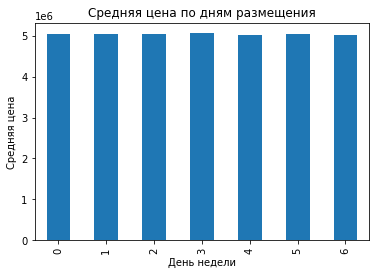

In [ ]:
# согласно заданию, построим столбчатую диаграмму
#для оценки взаимосвязи цены и дня размещения объявления
average_prices = data.groupby('first_exposition_weekday')['last_price'].mean()
average_prices.plot(kind='bar')
plt.title('Средняя цена по дням размещения')
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.show()

Связи цены с днем недели размещения объявления не обнаружено, что логично, тк в расчет берется выборка за несколько лет.

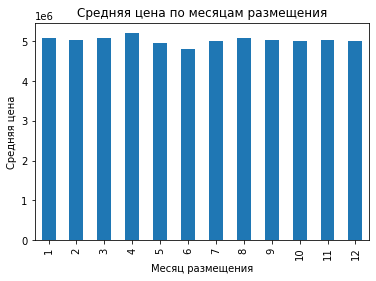

In [ ]:
# согласно заданию, построим столбчатую диаграмму
#для оценки взаимосвязи цены и месяца размещения объявления
average_prices = data.groupby('first_exposition_month')['last_price'].mean()
average_prices.plot(kind='bar')
plt.title('Средняя цена по месяцам размещения')
plt.xlabel('Месяц размещения')
plt.ylabel('Средняя цена')
plt.show()

Есть незначительное снижение цен на объекты в июне и октябре, но в целом связи цены с месяцем размещения объявления не обнаружено, что логично, тк в расчет берется выборка за несколько лет.

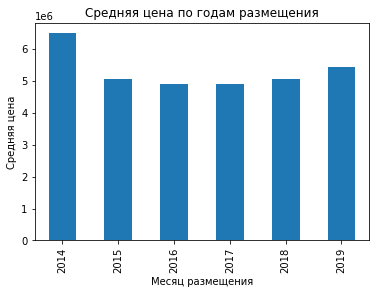

In [ ]:
# согласно заданию, построим столбчатую диаграмму
#для оценки взаимосвязи цены и месяца размещения объявления
average_prices = data.groupby('first_exposition_year')['last_price'].mean()
average_prices.plot(kind='bar')
plt.title('Средняя цена по годам размещения')
plt.xlabel('Месяц размещения')
plt.ylabel('Средняя цена')
plt.show()

По графику заметен небольшое снижение средней цены в 2017 году и последующий рост в 2018-2019 годах

In [ ]:
#cоздадим сводную таблицу для подсчета количества объявлений по каждому населённому пункту
locality_counts = pd.pivot_table(data, index='locality_name', values='last_price', aggfunc='count')

# выберем 10 населённых пунктов с наибольшим числом объявлений
top_localities = locality_counts.sort_values(by='last_price', ascending=False).head(10)

# отфильтруем данные для выбранных населённых пунктов
filtered_data = data[data['locality_name'].isin(top_localities.index)]

#создадим сводную таблицу для расчета средней цены за квадратный метр
avg_price_per_area = pd.pivot_table(filtered_data,
                                     index='locality_name',
                                     values='price_square_meter',
                                     aggfunc='mean')

print("10 населённых пунктов с наибольшим числом объявлений:")
print(top_localities)

#Исправление V1
avg_price_per_area = avg_price_per_area.sort_values(by='price_square_meter', ascending=False)

print("\nСредняя цена за квадратный метр для выбранных населённых пунктов:")
print(avg_price_per_area)

10 населённых пунктов с наибольшим числом объявлений:
                 last_price
locality_name              
Санкт-Петербург       11846
Мурино                  479
Шушары                  388
Кудрово                 361
Всеволожск              323
Колпино                 300
Парголово               293
Пушкин                  266
Гатчина                 235
Петергоф                169

Средняя цена за квадратный метр для выбранных населённых пунктов:
                 price_square_meter
locality_name                      
Санкт-Петербург          106322.883
Пушкин                   100646.119
Кудрово                   95109.548
Парголово                 90933.823
Мурино                    85702.808
Петергоф                  83511.212
Шушары                    78045.206
Колпино                   75093.076
Гатчина                   70982.696
Всеволожск                67657.453


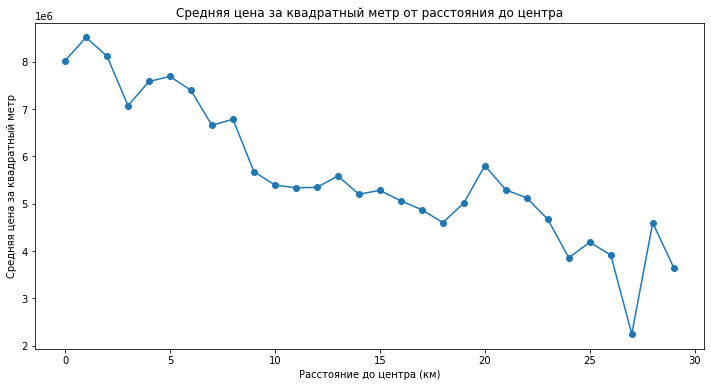

In [ ]:
# Выделяем данные для Санкт-Петербурга
data_spb = data[data['locality_name'] == 'Санкт-Петербург']

# Создаем сводную таблицу для расчета средней цены за квадратный метр и средней цены
avg_prices = pd.pivot_table(data_spb,
                             index='center_distance',
                             values=['price_square_meter', 'last_price'],
                             aggfunc='mean')

# Переименовываем столбцы
avg_prices.columns = ['avg_price_per_km', 'avg_last_price']

# Строим графики зависимостей
plt.figure(figsize=(12, 6))

# График средней цены за квадратный метр
plt.plot(avg_prices.index, avg_prices['avg_price_per_km'], marker='o')
plt.title('Средняя цена за квадратный метр от расстояния до центра')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена за квадратный метр')

plt.show()

График показывает отрицательную корреляцию - чем дальше от центра, тем ниже цена. Однако, есть резкий рос на расстоянии около 27 км от центра, это говорит о высокой стоимости загородной недвижимости

#### Предварительный вывод

Проведено исследование распределения значений.

Большинство квартир имеют общую площадь 30 до 62 кв.м.

Жилая площадь в основной массе находится в интервале 18 до 38 кв.м.

Большая часть кухонь находится в диапазоне от 7 до 11 кв.м

Диапазон стоимости объектов недвижимости от 3,500,000 до 5,800,000 рублей.

Большинство квартир являются небольшими, с преобладанием однокомнатных и двухкомнатных квартир.

Большая часть квартир имеет высоту потолков 2.4-2.75 метра.

Большинство продаваемых квартир расположены на этажах ниже 9, что говорит о том, что преобладает вторичный рынок жилья в районах старой застройки, и появляются предложения в домах выше 9 этажей (это явно новое жилье/первичные предложения).

Очевидно, что предложений по средним этажам больше, чем по первым и последним, тк средних этажей в рамках одного дома меньше, чем первых и последних по отдельности

Большая часть зданий имеет количество этажей 16 и ниже. Четверть всех зданий в наборе данных имеют 4 этажа или меньше

Большая часть квартир находится на расстоянии 16,605 километров от центра.

Большая часть квартир находится на расстоянии 30000 метров от аэропорта.

Продаваемые объекты расположены на различных расстояниях от парков, с преобладанием объектов, находящихся на расстоянии до 500 метров.

Чаще всего объявления размещали со вторника по пятницу. Реже - в субботу и воскресенье (в выходные дни).

Больше всего объявлений размещалось в ноябре и феврале. Меньше всего в декабре-январе и мае - возможно, это связано с большим количеством праздников (период отпусков, длинных выходных дней).

Четверть объектов находятся на продаже менее 34 дней - это очень быстрые продажи. Нормальный (не быстрый и не медленный) срок продажи - от 74 до 103 дней (примерно от двух до трех месяцев). Долгими продажами будем считать более 150 дней (от 5 месяцев).


Прослеживается положительная корреляция цены с общей площадью, жилой площадью, площади кухни и количеством комнат, присутствует отрицательная корреляция с расстоянием от центра.

По графику видна зависимость - чем больше комнат, тем выше средняя цена.

Выявляется зависимость - дешевле всего объекты на первом этаже, чуть дороже - на последнем этаже. Цена выше на объекты на средних этажах.

Связи цены с днем недели размещения объявления не обнаружено, что логично.

Есть незначительное снижение цен на объекты в июне и октябре.

По графику заметен небольшое снижение средней цены в 2017 году и последующий рост в 2018-2019 годах

10 населённых пунктов с наибольшим числом объявлений:
                 last_price
locality_name              
Санкт-Петербург        8582
Мурино                  346
Шушары                  302
Кудрово                 269
Колпино                 239
Всеволожск              222
Парголово               211
Пушкин                  182
Гатчина                 167
Петергоф                130


Средняя цена за квадратный метр для выбранных населённых пунктов:
                 price_square_meter
locality_name               
Санкт-Петербург          104458.878
Пушкин                    99868.139
Кудрово                   94984.545
Парголово                 90529.488
Мурино                    86089.696
Петергоф                  82625.248
Шушары                    78336.126
Колпино                   73860.522
Гатчина                   69989.756
Всеволожск                67575.939

Выявлена отрицательная корреляция - чем дальше от центра, тем ниже цена. Однако, есть резкий рос на расстоянии около 27 км от центра, это говорит о высокой стоимости загородной недвижимости

### Общий вывод

Проведен обзор базы данных, найдены и изучены пропущенные значения в столбцах, заполнены пропущенные значения, где это возможно, рассмотрены типы данных в каждом столбце, изменены last_price, first_day_exposition, rooms, floor, balcony на тип int. Изучить уникальные значения в столбце с названиями и устранены неявные дубликаты. Найдены и устранены редкие и аномальные значения.

Проведено исследование распределения значений.

Большинство квартир имеют общую площадь 30 до 62 кв.м.

Жилая площадь в основной массе находится в интервале 18 до 38 кв.м.

Большая часть кухонь находится в диапазоне от 7 до 11 кв.м

Диапазон стоимости объектов недвижимости от 3,500,000 до 5,800,000 рублей.

Большинство квартир являются небольшими, с преобладанием однокомнатных и двухкомнатных квартир.

Большая часть квартир имеет высоту потолков 2.4-2.75 метра.

Большинство продаваемых квартир расположены на этажах ниже 9, что говорит о том, что преобладает вторичный рынок жилья в районах старой застройки, и появляются предложения в домах выше 9 этажей (это явно новое жилье/первичные предложения).

Очевидно, что предложений по средним этажам больше, чем по первым и последним, тк средних этажей в рамках одного дома меньше, чем первых и последних по отдельности

Большая часть зданий имеет количество этажей 16 и ниже. Четверть всех зданий в наборе данных имеют 4 этажа или меньше

Большая часть квартир находится на расстоянии 16,605 километров от центра.

Большая часть квартир находится на расстоянии 30000 метров от аэропорта.

Продаваемые объекты расположены на различных расстояниях от парков, с преобладанием объектов, находящихся на расстоянии до 500 метров.

Чаще всего объявления размещали со вторника по пятницу. Реже - в субботу и воскресенье (в выходные дни).

Больше всего объявлений размещалось в ноябре и феврале. Меньше всего в декабре-январе и мае - возможно, это связано с большим количеством праздников (период отпусков, длинных выходных дней).

Четверть объектов находятся на продаже менее 34 дней - это очень быстрые продажи. Нормальный (не быстрый и не медленный) срок продажи - от 74 до 103 дней (примерно от двух до трех месяцев). Долгими продажами будем считать более 150 дней (от 5 месяцев).

Прослеживается положительная корреляция цены с общей площадью, жилой площадью, площади кухни и количеством комнат, присутствует отрицательная корреляция с расстоянием от центра.

По графику видна зависимость - чем больше комнат, тем выше средняя цена.

Выявляется зависимость - дешевле всего объекты на первом этаже, чуть дороже - на последнем этаже. Цена выше на объекты на средних этажах.

Связи цены с днем недели размещения объявления не обнаружено, что логично.

Есть незначительное снижение цен на объекты в июне и октябре.

По графику заметен небольшое снижение средней цены в 2017 году и последующий рост в 2018-2019 годах

10 населённых пунктов с наибольшим числом объявлений:
Санкт-Петербург 8582 Мурино 346 Шушары 302 Кудрово 269 Колпино 239 Всеволожск 222 Парголово 211 Пушкин 182 Гатчина 167 Петергоф 130

Средняя цена за квадратный метр для выбранных населённых пунктов:
Санкт-Петербург 104458.878 Пушкин 99868.139 Кудрово 94984.545 Парголово 90529.488 Мурино 86089.696 Петергоф 82625.248 Шушары 78336.126 Колпино 73860.522 Гатчина 69989.756 Всеволожск 67575.939

Выявлена отрицательная корреляция - чем дальше от центра, тем ниже цена. Однако, есть резкий рос на расстоянии около 27 км от центра, это говорит о высокой стоимости загородной недвижимости.

Таким образом, потверждены гипотезы:
- Цена квартиры зависит от её общей и жилой площадей, от площади кухни - чем больше площадь квартиры, тем выше её стоимость.
- Цена квартиры зависит от числа комнат - квартиры с большим числом комнат, как правило, дороже.
- Квартиры, расположенные ближе к центру города, аэропорту, паркам и водоёмам, стоят дороже.
- Цена квартиры зависит от этажа - первые и последние этажи ценятся меньше, чем средние.

В результате исследования выявлена зависимость цены цены с общей площадью, жилой площадью, площади кухни - чем больше площадь объекта, тем выше цена. Величина жилой площади напрямую зависит от общей площади.

Количество комнат также влияет на цену - многоквартирные объекты стоят дороже, чем однокомнатные.

Дешевле всего объекты на первом этаже, чуть дороже - на последнем этаже. Цена выше на объекты на средних этажах.

Самая дорогая недвижимость - в центре города. По мере удаления от центра цена снижается, однако, загородная недвижимость имеет среднюю цену выше, чем некоторя городская. Имеет смысл выделить ее в отдельную категорию и исследовать прицельно.

Интересно было бы провести исследование зависимости цены от года постройки объекта, района города, если такие данные возможно найти.

Поподробнее надо исследовать период размещения объекта, уточнить, есть ли автоматическое закрытие объявления.
    
Также рекомендовано разобраться в большом количестве пропусков в картографических данных, однако, это может быть следствием развития сервиса объявлений (выяснить, в какой период появлялись дополнительные параметры объявления, связано ли с этим количество пропусков).


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод